## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

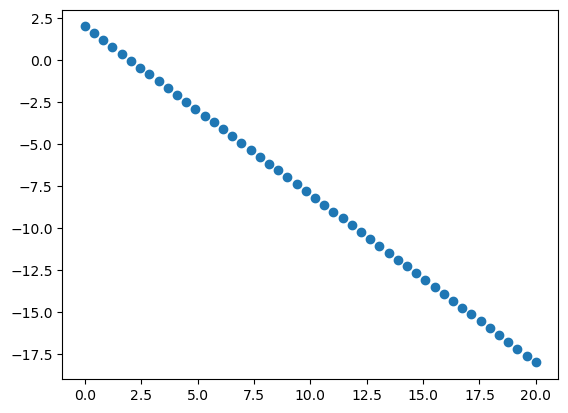

In [ ]:
plt.scatter(X,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [4]:
def adagrad( X, y, alpha,epsilon, iterations=1000, theta_0=0, theta_1=0,convergance_rate=0.001, norm_value_check=0.001):
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    losses = []
    theta_0_all = []
    theta_1_all = []
    vt_0 = 0
    vt_1 = 0
    h=[]

    for i in range(iterations):
        # Append theta first due to initialization
        theta_0_all.append(theta_0)
        theta_1_all.append(theta_1)

        # Predict==> updated theta_temp
        h = theta_0 + theta_1 * X

        # Calculate J & Error Vector
        error_vector = h - y
        J = np.sum(error_vector**2) / (2 * m)
        losses.append(J)

        # Theta 0 gradient & Theta 1 gradient
        d_theta_0 = (1 / m) * np.sum(error_vector)
        d_theta_1 = (1 / m) * np.sum(error_vector * X)

        grad_vec = np.array([d_theta_0, d_theta_1])
        grad_norm = np.linalg.norm(grad_vec)

        # Convergence check
        if (grad_norm < norm_value_check) or ((i > 1) and (abs(losses[-2] - J) < convergance_rate)):
            return theta_0, theta_1, losses, theta_0_all, theta_1_all,h

        vt_0 = vt_0+(d_theta_0**2)
        vt_1 = vt_1+(d_theta_1**2)

         #update theta
        theta_0=theta_0 - (alpha / np.sqrt(vt_0)+epsilon)*d_theta_0
        theta_1=theta_1 - (alpha / np.sqrt(vt_1)+epsilon)*d_theta_1


        # Print like verbose we have in sklearn
        print(f"****************** Iteration {i} ********************")
        print(f"\nh(x): {h}\n")
        print(f"Error Vector:\n{error_vector}\n")
        print(f"J = {J}\n")
        print(f"Gradient Vector:\n[[{d_theta_0}]\n [{d_theta_1}]]\n")
        print(f"Gradient Vector Norm: {grad_norm}\n")
        print(f"theta_0_new: {theta_0}\ntheta_1_new: {theta_1}\n")

    # Final h with error_vector
    error_vector = (theta_0 + theta_1 * X) - y
    # Final Cost
    final_cost = np.sum(error_vector**2) / (2 * m)
    # predictions
    final_predictions = theta_0 + theta_1 * X
    print(f"Final theta_0: {theta_0}")
    print(f"Final theta_1: {theta_1}")
    print(f"Final Cost: {final_cost}")
    print(f"Final Predictions: {final_predictions}\n")

    return theta_0, theta_1, losses, theta_0_all, theta_1_all,h

In [ ]:
theta_0, theta_1, losses, theta_0_all, theta_1_all,h=adagrad(X,y,0.05,1e-08,500)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

J = 49.34693877551021

Gradient Vector:
[[8.0]
 [114.69387755102042]]

Gradient Vector Norm: 114.97254258164628

theta_0_new: -0.05000008
theta_1_new: -0.05000114

In [ ]:
from sklearn.metrics import r2_score
final_predictions=theta_0+theta_1*X
r2_score(y,final_predictions)

0.9484672858893667

In [4]:
#plot losses with total epochs
def plt_loss_epoch(loss):
    plt.rcParams['figure.figsize'] = [9.8, 6.6]
    plt.plot(loss,"-m",marker=".",markersize=15)
    plt.ylabel("loss")
    plt.xlabel("Epochs")
    plt.grid()

#plot the loss with all theta_0 values
def plt_loss_theta_0(loss,theta_0,mode="gd",gamma="0.5"):
    plt.plot(theta_0,loss,"-m",marker=".",markersize=15)
    plt.ylabel("loss",fontweight='bold',fontsize=14.0)
    plt.xlabel("Theta 0",fontweight='bold',fontsize=14.0)
    if mode=="gd":
        plt.title("Learning Rate = 0.0005",fontweight='bold',fontsize=14.0)
        plt.grid()
    elif mode=="mgd":
        plt.title(f"Learning Rate = 0.0005 & ɣ={gamma}",fontweight='bold',fontsize=14.0)
        plt.grid()


#plot the loss with all theta_1 values

def plt_loss_theta_1(loss,theta_1,mode="gd",gamma=0.5):
    plt.plot(theta_1,loss,"-m",marker=".",markersize=15)
    plt.ylabel("loss",fontweight='bold',fontsize=14.0)
    plt.xlabel("Theta 1",fontweight='bold',fontsize=14.0)
    if mode=="gd":
        plt.title("Learning Rate = 0.0005",fontweight='bold',fontsize=14.0)
        plt.grid()
    elif mode=="mgd":
        plt.title(f"Learning Rate = 0.0005 & ɣ={gamma}",fontweight='bold',fontsize=14.0)
        plt.grid()

def until_converage(theta_0_all,theta_1_all,X,y):
    plt.scatter(X, y)
    # Plot all regression lines till converge
    for i in range(len(theta_0_all)):
        y_pred = theta_0_all[i] + theta_1_all[i] * X
        plt.plot(X, y_pred, color='red')
       # final regression line
        plt.title('Regression Lines at Different Stages')
        plt.grid(True)

def final_model(X,y,final_predictions):
    #x and y and y predicted
    fig.add_subplot(5,1,5)
    plt.plot(X,y," ",marker=".", markersize=13)
    plt.plot(X,final_predictions,color='r')
    plt.ylabel("y")
    plt.xlabel("x")
    plt.grid()
    plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


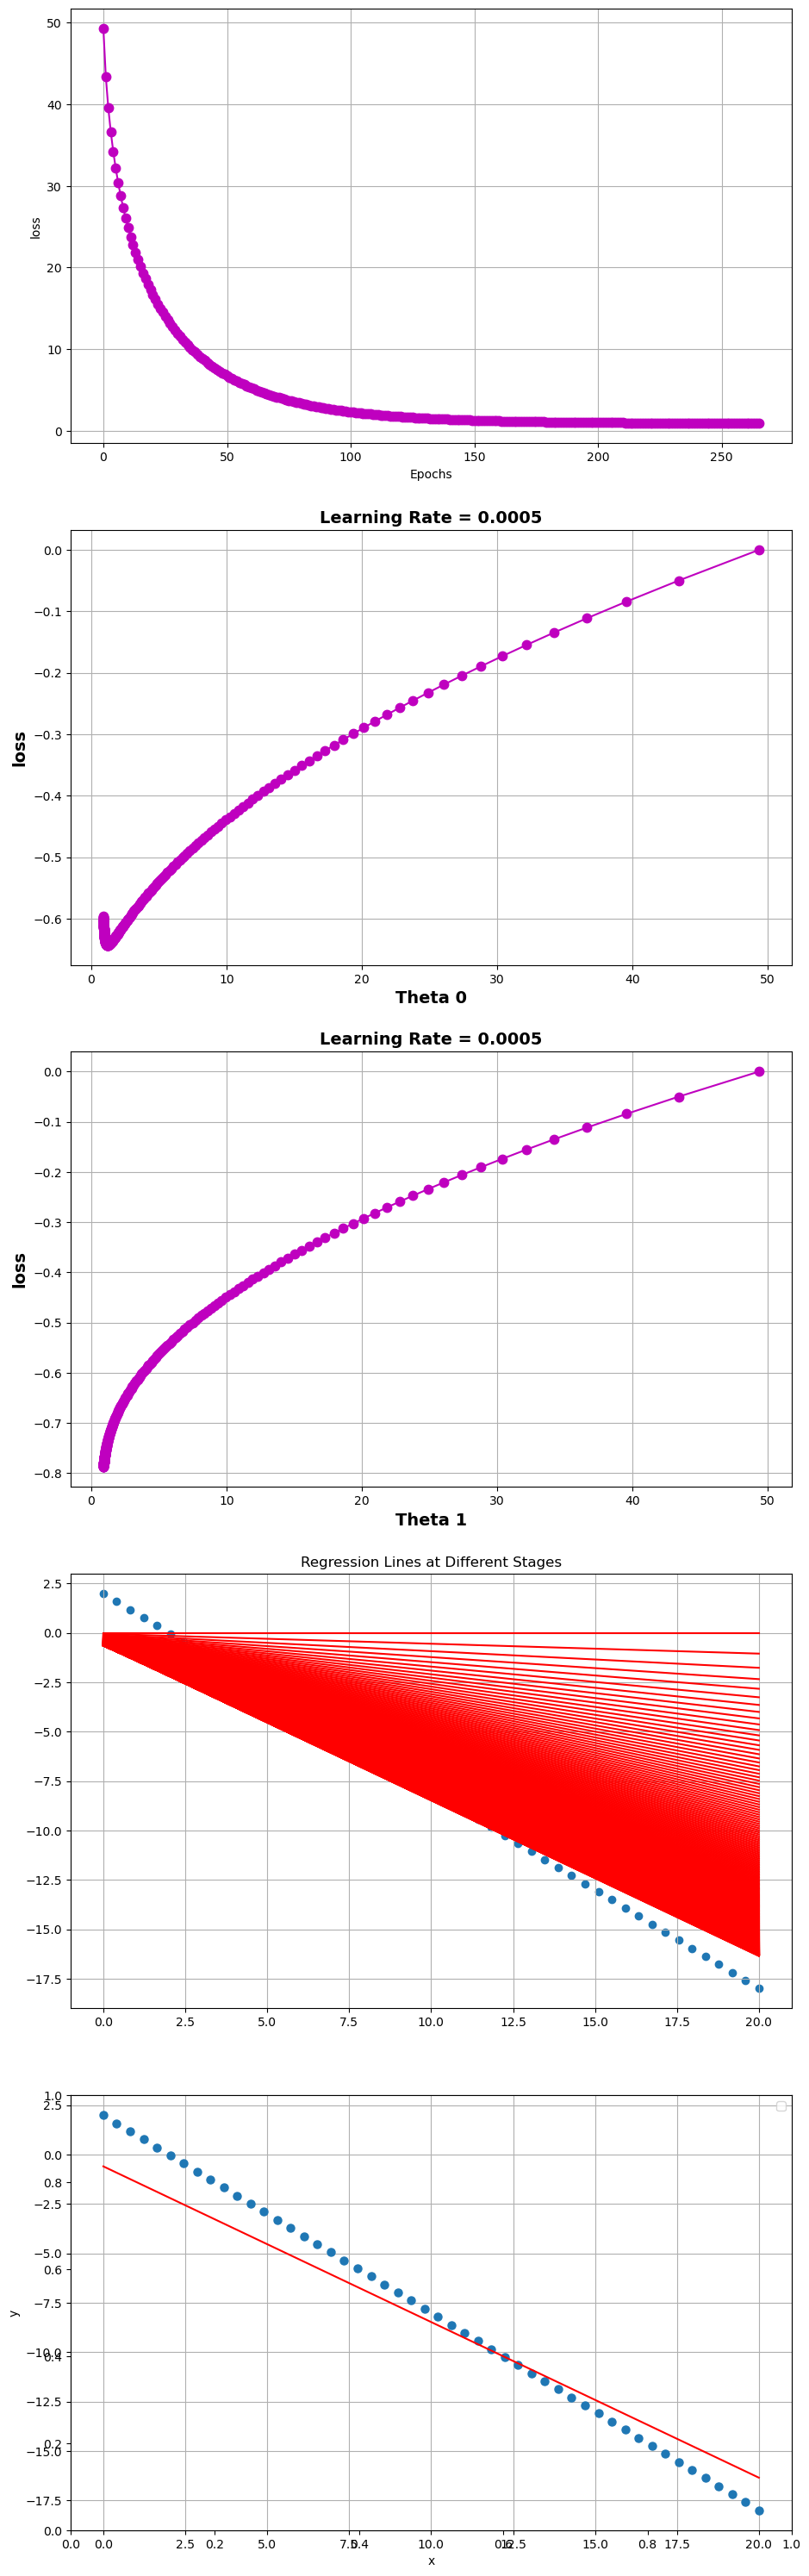

In [ ]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta_0, theta_1, losses, theta_0_all, theta_1_all,h=adagrad(X,y,0.005,1e-08,5000)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Error Vector:
[-2.51062564 -2.31880138 -2.12697712 -1.93515286 -1.7433286  -1.55150434
 -1.35968008 -1.16785582 -0.97603157 -0.78420731 -0.59238305 -0.40055879
 -0.20873453 -0.01691027  0.17491399  0.36673825  0.5585625   0.75038676
  0.94221102  1.13403528  1.32585954  1.5176838   1.70950806  1.90133232
  2.09315658  2.28498083  2.47680509  2.66862935  2.86045361  3.05227787
  3.24410213  3.43592639  3.62775065  3.81957491  4.01139916  4.20322342
  4.39504768  4.58687194  4.7786962   4.97052046  5.16234472  5.35416898
  5.54599324  5.73781749  5.92964175  6.12146601  6.31329027  6.50511453
  6.69693879  6.88876305]

J = 6.227451279775633

Gradient Vector:
[[2.1890687050468705]
 [38.195749053386486]]

Gradient Vector Norm: 38.25842740553629

theta_0_new: -0.5106664506018407
theta_1_new: -0.5300773592760547

****************** Iteration 4223 ********************

h(x): [ -0.51066645  -0.72702456  -0.94338266  -1.15974077  -1.37609887
  -1.59245698  -1.80881509  -2.02517319  -2.2415313  

In [ ]:
final_predictions=theta_0+theta_1*X
r2_score(y,final_predictions)

0.7135773792872017

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


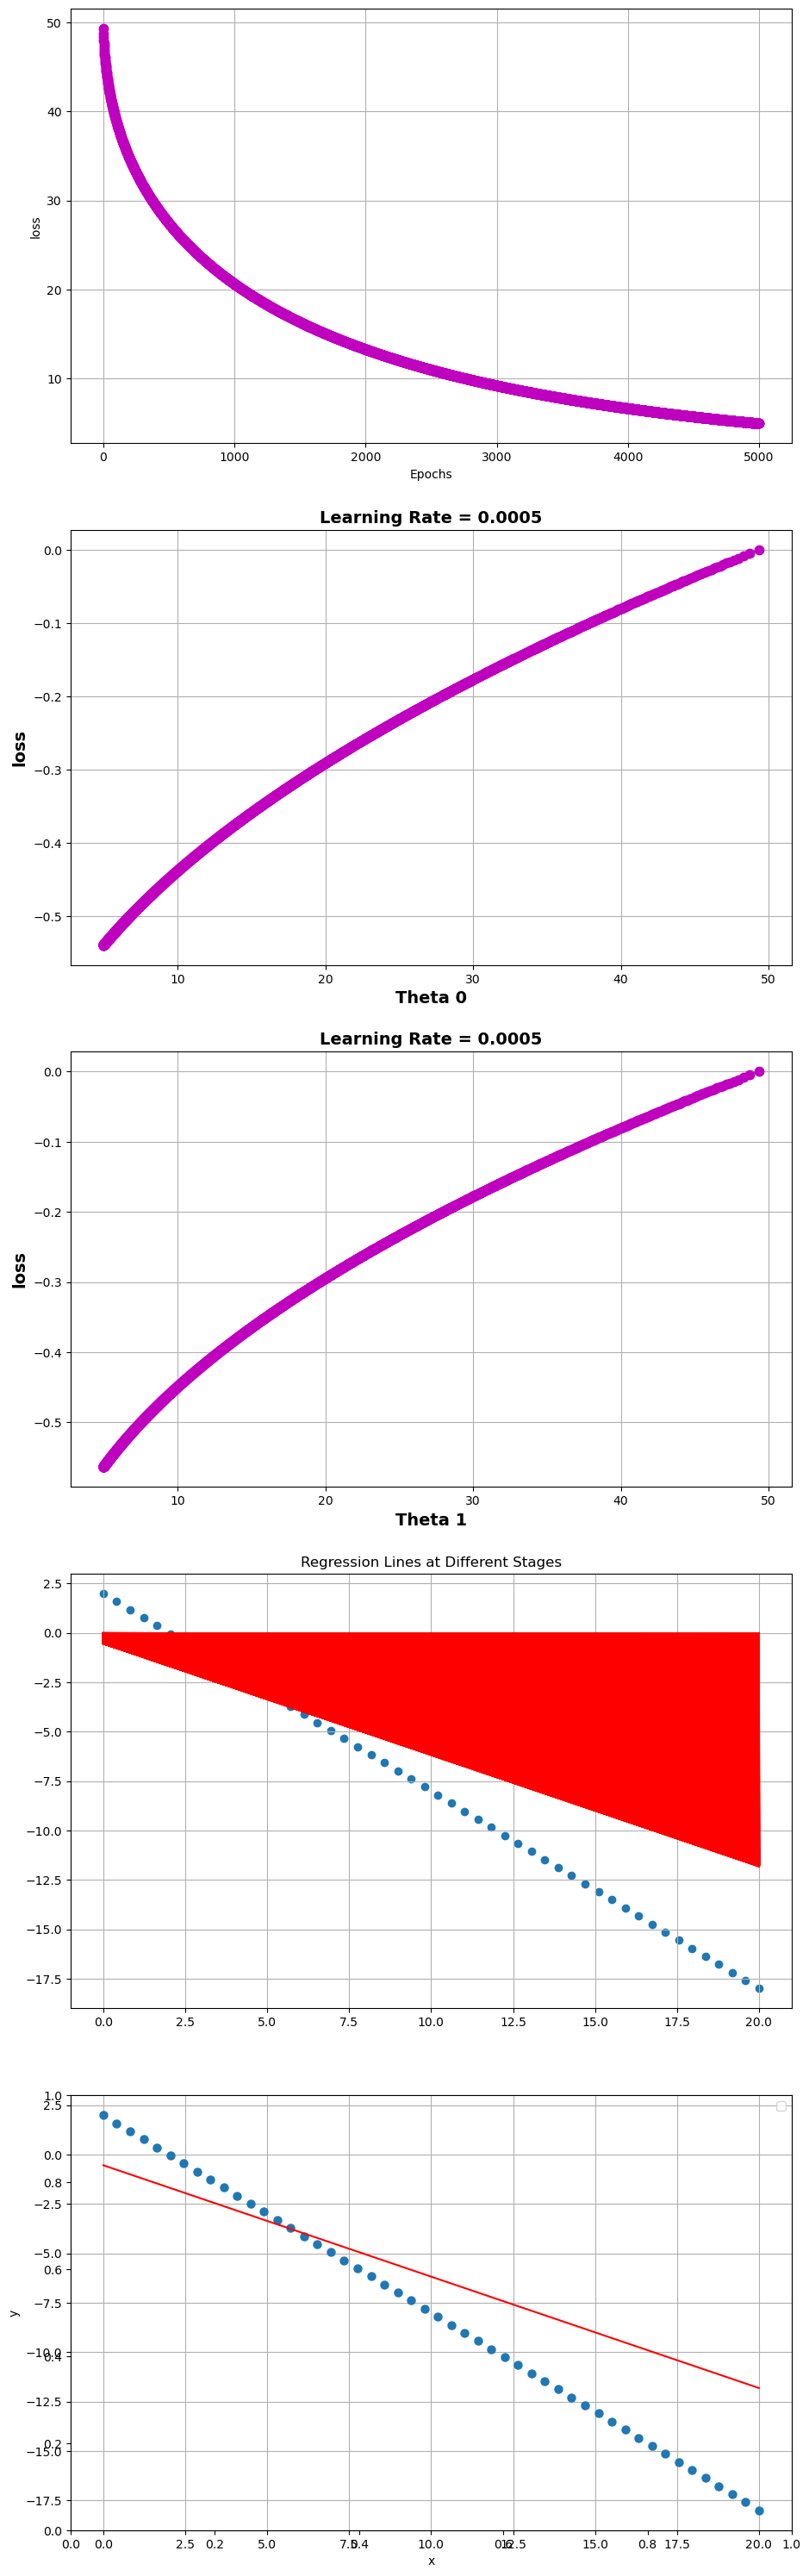

In [ ]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

In [6]:
theta_0, theta_1, losses, theta_0_all, theta_1_all,h=adagrad(X,y,0.0005,1e-08,5000)

Streaming output truncated to the last 5000 lines.
theta_1_new: -0.06279661523788413

****************** Iteration 3647 ********************

h(x): [-0.0590283  -0.08465957 -0.11029084 -0.13592211 -0.16155338 -0.18718466
 -0.21281593 -0.2384472  -0.26407847 -0.28970974 -0.31534101 -0.34097228
 -0.36660356 -0.39223483 -0.4178661  -0.44349737 -0.46912864 -0.49475991
 -0.52039118 -0.54602246 -0.57165373 -0.597285   -0.62291627 -0.64854754
 -0.67417881 -0.69981009 -0.72544136 -0.75107263 -0.7767039  -0.80233517
 -0.82796644 -0.85359771 -0.87922899 -0.90486026 -0.93049153 -0.9561228
 -0.98175407 -1.00738534 -1.03301662 -1.05864789 -1.08427916 -1.10991043
 -1.1355417  -1.16117297 -1.18680424 -1.21243552 -1.23806679 -1.26369806
 -1.28932933 -1.3149606 ]

Error Vector:
[-2.0590283  -1.6764963  -1.29396431 -0.91143232 -0.52890032 -0.14636833
  0.23616367  0.61869566  1.00122765  1.38375965  1.76629164  2.14882363
  2.53135563  2.91388762  3.29641962  3.67895161  4.0614836   4.4440156
  4.826547

In [7]:
final_predictions=theta_0+theta_1*X
r2_score(y,final_predictions)

-1.4112760531178261

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [4]:
def RMSProp( X, y, alpha,beta,epsilon, iterations=1000, theta_0=0, theta_1=0,convergance_rate=0.001, norm_value_check=0.001):
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    losses = []
    theta_0_all = []
    theta_1_all = []
    vt_0 = 0
    vt_1 = 0
    h=[]

    for i in range(iterations):
        # Append theta first due to initialization
        theta_0_all.append(theta_0)
        theta_1_all.append(theta_1)

        # Predict==> updated theta_temp
        h = theta_0 + theta_1 * X

        # Calculate J & Error Vector
        error_vector = h - y
        J = np.sum(error_vector**2) / (2 * m)
        losses.append(J)

        # Theta 0 gradient & Theta 1 gradient
        d_theta_0 = (1 / m) * np.sum(error_vector)
        d_theta_1 = (1 / m) * np.sum(error_vector * X)

        grad_vec = np.array([d_theta_0, d_theta_1])
        grad_norm = np.linalg.norm(grad_vec)

        # Convergence check
        if (grad_norm < norm_value_check) or ((i > 1) and (abs(losses[-2] - J) < convergance_rate)):
            return theta_0, theta_1, losses, theta_0_all, theta_1_all,h

        vt_0 = (beta*vt_0)+((1-beta)*(d_theta_0**2))
        vt_1 = beta*vt_1+((1-beta)*(d_theta_1**2))

         #update theta
        theta_0=theta_0 - (alpha / np.sqrt(vt_0)+epsilon)*d_theta_0
        theta_1=theta_1 - (alpha / np.sqrt(vt_1)+epsilon)*d_theta_1


        # Print like verbose we have in sklearn
        print(f"****************** Iteration {i} ********************")
        print(f"\nh(x): {h}\n")
        print(f"Error Vector:\n{error_vector}\n")
        print(f"J = {J}\n")
        print(f"Gradient Vector:\n[[{d_theta_0}]\n [{d_theta_1}]]\n")
        print(f"Gradient Vector Norm: {grad_norm}\n")
        print(f"theta_0_new: {theta_0}\ntheta_1_new: {theta_1}\n")

    # Final h with error_vector
    error_vector = (theta_0 + theta_1 * X) - y
    # Final Cost
    final_cost = np.sum(error_vector**2) / (2 * m)
    # predictions
    final_predictions = theta_0 + theta_1 * X
    print(f"Final theta_0: {theta_0}")
    print(f"Final theta_1: {theta_1}")
    print(f"Final Cost: {final_cost}")
    print(f"Final Predictions: {final_predictions}\n")

    return theta_0, theta_1, losses, theta_0_all, theta_1_all,h

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [8]:
theta_0, theta_1, losses, theta_0_all, theta_1_all,h=RMSProp(X, y, 0.05,0.9,1e-08, iterations=500)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

J = 49.34693877551021

Gradient Vector:
[[8.0]
 [114.69387755102042]]

Gradient Vector Norm: 114.97254258164628

theta_0_new: -0.158113963008419
theta_1_new: -0.1

In [9]:
final_predictions=theta_0+theta_1*X
r2_score(y,final_predictions)

0.999333115789468

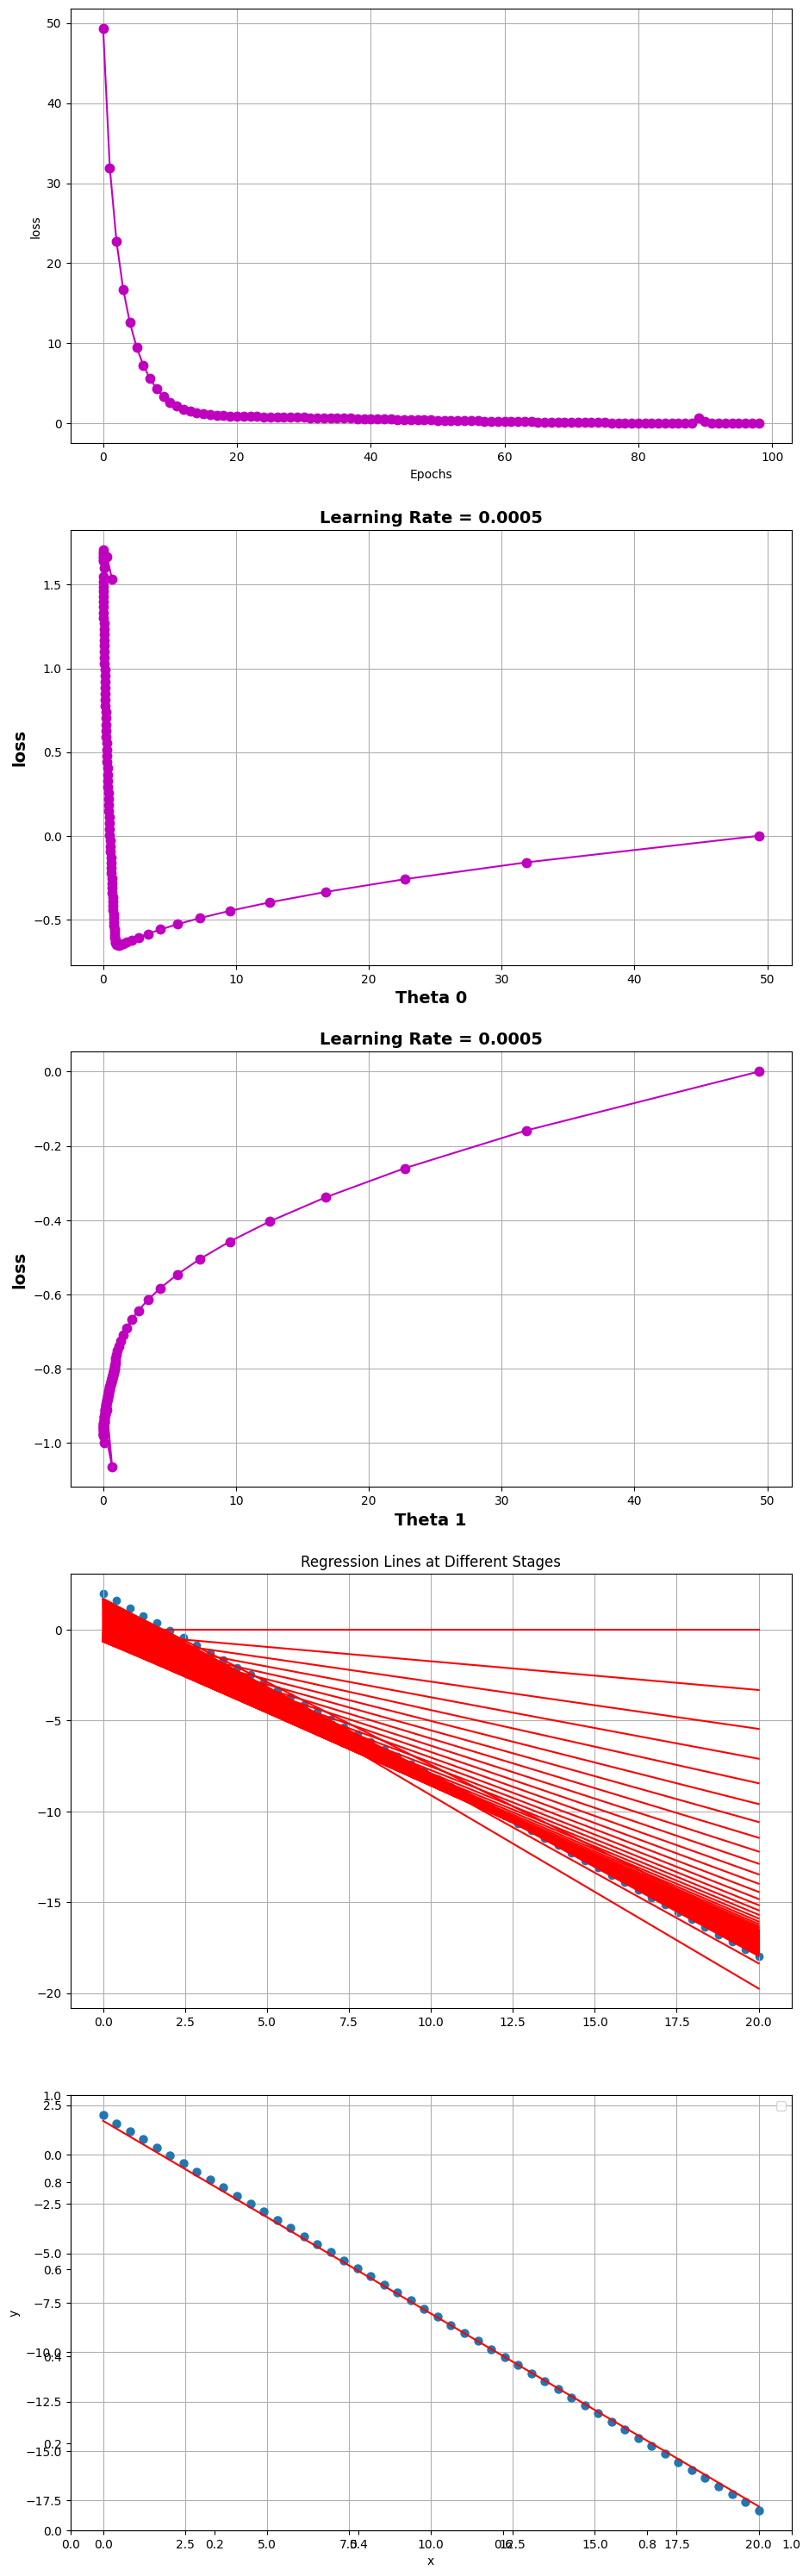

In [10]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)

##### The following results uses alpha = 0.005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [11]:
theta_0, theta_1, losses, theta_0_all, theta_1_all,h=RMSProp(X, y, 0.005,0.9,1e-08, iterations=5000)

Streaming output truncated to the last 5000 lines.
  3.09197097  3.25006986  3.40816875  3.56626764  3.72436653  3.88246541
  4.0405643   4.19866319  4.35676208  4.51486097  4.67295985  4.83105874
  4.98915763  5.14725652]

J = 3.413957506236199

Gradient Vector:
[[1.2738337627396739]
 [26.176743105225757]]

Gradient Vector Norm: 26.207718940267956

theta_0_new: -0.6032406317231178
theta_1_new: -0.6167287923211289

****************** Iteration 126 ********************

h(x): [ -0.60324063  -0.85496667  -1.10669271  -1.35841874  -1.61014478
  -1.86187082  -2.11359686  -2.3653229   -2.61704893  -2.86877497
  -3.12050101  -3.37222705  -3.62395308  -3.87567912  -4.12740516
  -4.3791312   -4.63085723  -4.88258327  -5.13430931  -5.38603535
  -5.63776139  -5.88948742  -6.14121346  -6.3929395   -6.64466554
  -6.89639157  -7.14811761  -7.39984365  -7.65156969  -7.90329572
  -8.15502176  -8.4067478   -8.65847384  -8.91019988  -9.16192591
  -9.41365195  -9.66537799  -9.91710403 -10.16883006 -10.4

In [14]:
final_predictions=theta_0+theta_1*X

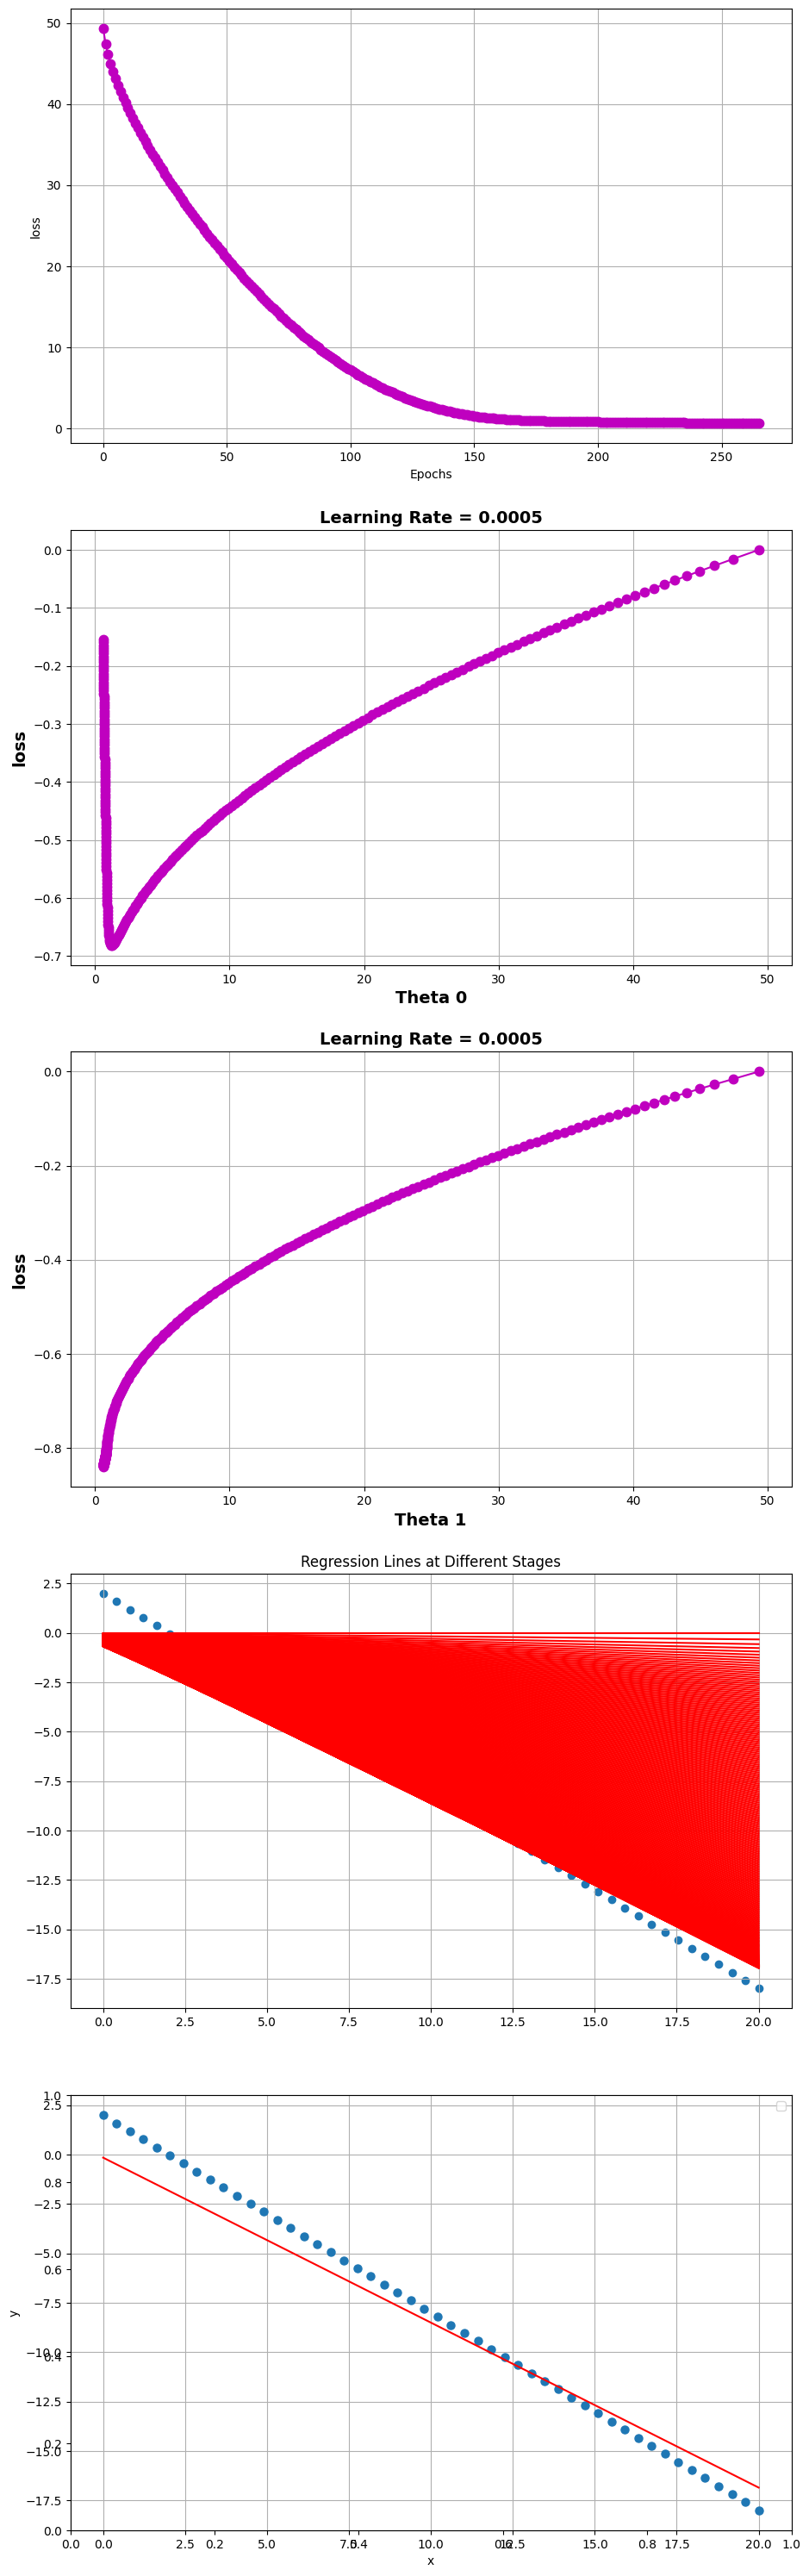

In [15]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)

##### The following results uses alpha = 0.0005, beta = 0.9, epsilon =  1e-08, and max. iterations = 5000.

In [16]:
theta_0, theta_1, losses, theta_0_all, theta_1_all,h=RMSProp(X, y, 0.0005,0.9,1e-08, iterations=5000)

Streaming output truncated to the last 5000 lines.
theta_1_new: -0.727462915798709

****************** Iteration 1466 ********************

h(x): [ -0.71436926  -1.0112929   -1.30821654  -1.60514018  -1.90206382
  -2.19898746  -2.4959111   -2.79283473  -3.08975837  -3.38668201
  -3.68360565  -3.98052929  -4.27745293  -4.57437657  -4.87130021
  -5.16822385  -5.46514749  -5.76207113  -6.05899477  -6.3559184
  -6.65284204  -6.94976568  -7.24668932  -7.54361296  -7.8405366
  -8.13746024  -8.43438388  -8.73130752  -9.02823116  -9.3251548
  -9.62207843  -9.91900207 -10.21592571 -10.51284935 -10.80977299
 -11.10669663 -11.40362027 -11.70054391 -11.99746755 -12.29439119
 -12.59131483 -12.88823846 -13.1851621  -13.48208574 -13.77900938
 -14.07593302 -14.37285666 -14.6697803  -14.96670394 -15.26362758]

Error Vector:
[-2.71436926 -2.60312964 -2.49189001 -2.38065038 -2.26941076 -2.15817113
 -2.0469315  -1.93569188 -1.82445225 -1.71321263 -1.601973   -1.49073337
 -1.37949375 -1.26825412 -1.1570144

In [17]:
final_predictions=theta_0+theta_1*X
r2_score(y,final_predictions)

0.9476872054929459

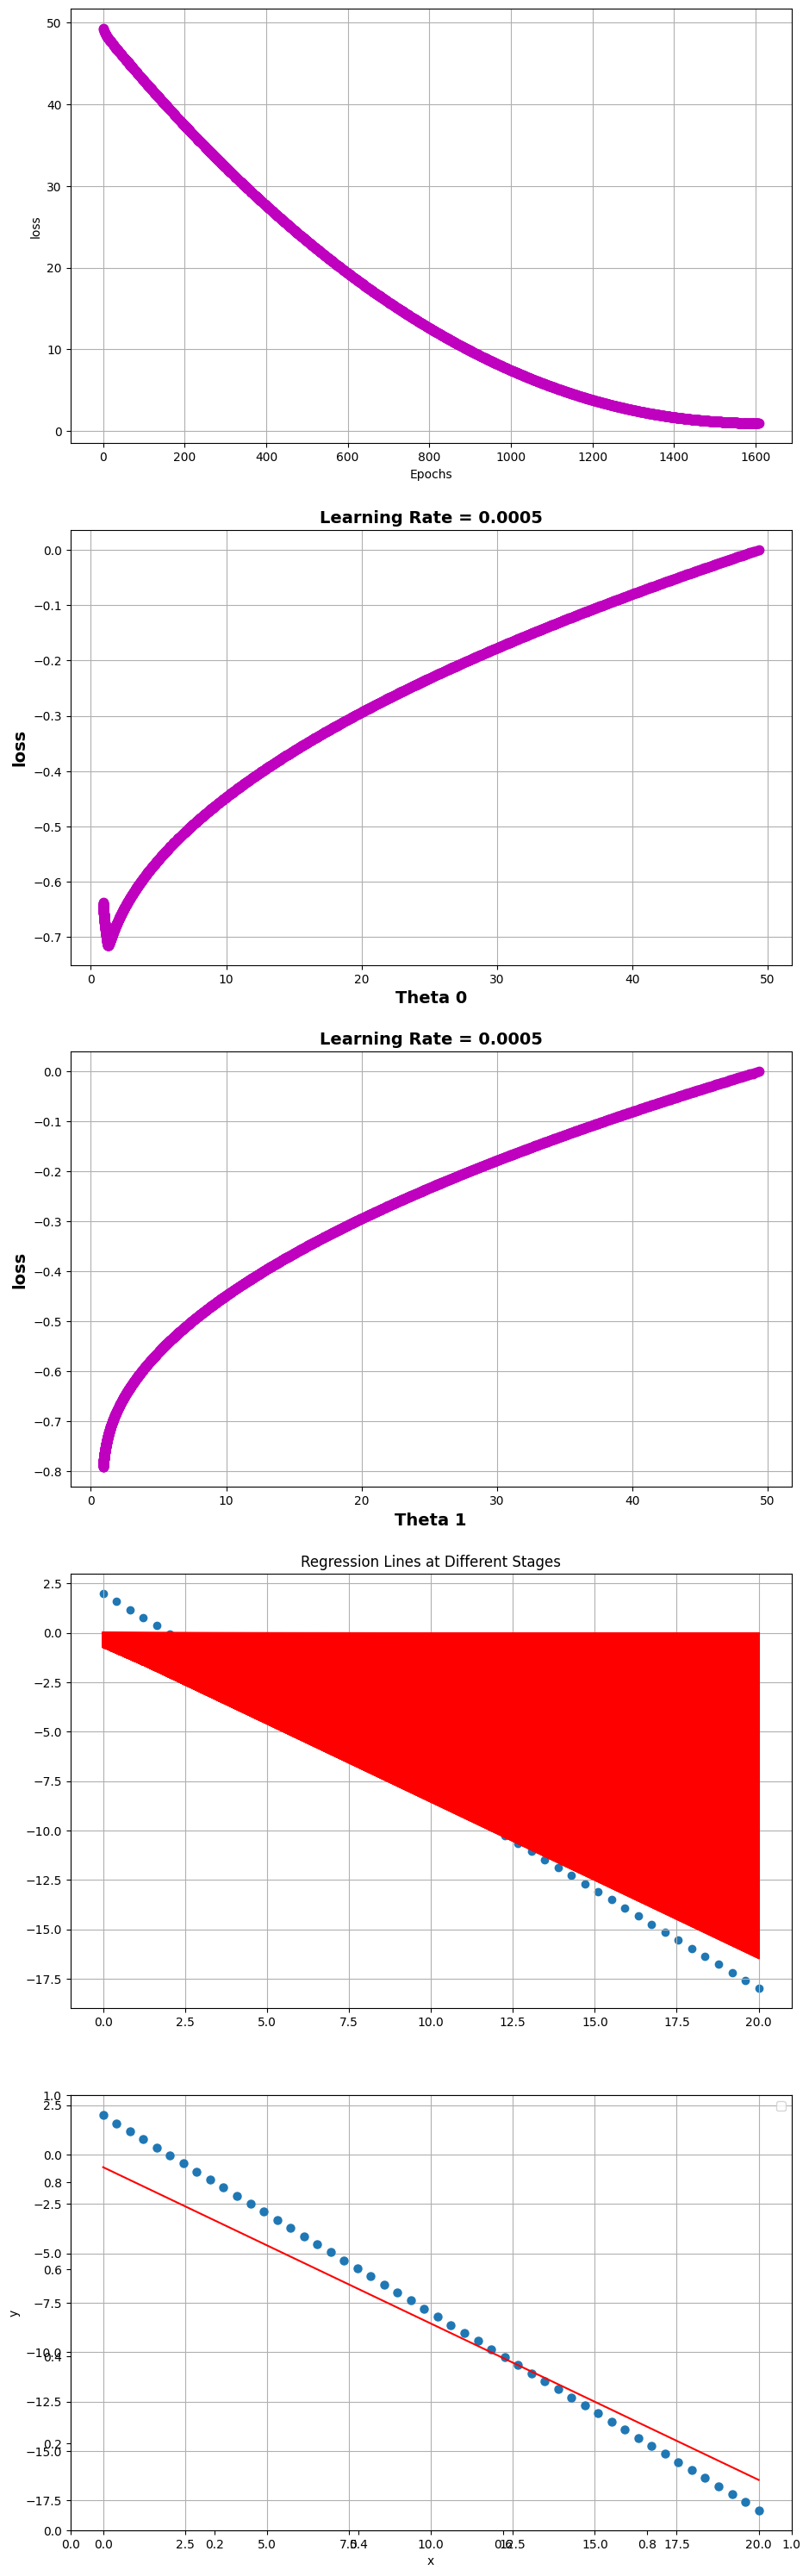

In [18]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [11]:
def adam(X, y, alpha, beta1,beta2, epsilon, iterations=1000, theta_0=0, theta_1=0,convergance_rate=0.001, norm_value_check=0.001):
    m = len(X)
    theta_0 = 0
    theta_1 = 0
    losses = []
    theta_0_all = []
    theta_1_all = []
    vt_0 = 0
    vt_1 = 0
    mt_theta_0=0
    mt_theta_1=1
    h=[]

    for i in range(iterations):
        # Append theta first due to initialization
        theta_0_all.append(theta_0)
        theta_1_all.append(theta_1)

        # Predict==> updated theta_temp
        h = theta_0 + theta_1 * X

        # Calculate J & Error Vector
        error_vector = h - y
        J = np.sum(error_vector**2) / (2 * m)
        losses.append(J)

        # Theta 0 gradient & Theta 1 gradient
        d_theta_0 = (1 / m) * np.sum(error_vector)
        d_theta_1 = (1 / m) * np.sum(error_vector * X)

        grad_vec = np.array([d_theta_0, d_theta_1])
        grad_norm = np.linalg.norm(grad_vec)

        # Convergence check
        if (grad_norm < norm_value_check) or ((i > 1) and (abs(losses[-2] - J) < convergance_rate)):
            return theta_0, theta_1, losses, theta_0_all, theta_1_all,h

        # momentum equationS
        mt_theta_0 = (mt_theta_0 * beta1) + ((1 - beta1) * d_theta_0)
        mt_theta_1 = (mt_theta_1 * beta1) + ((1 - beta1) * d_theta_1)

        # rms equations
        # calculate vt_1
        vt_0 = (beta2 * vt_0) + ((1 - beta2) * (d_theta_0 ** 2))
        vt_1 = (beta2 * vt_1) + ((1 - beta2) * (d_theta_1 ** 2))

        # Bias correction
        mt_theta0_h = mt_theta_0 / (1 - pow(beta1,i+1))
        mt_theta1_h = mt_theta_1 / (1 - pow(beta1,i+1))

        vt_theta0_h = vt_0 / (1 - pow(beta2,i+1))
        vt_theta1_h = vt_1 / (1 - pow(beta2,i+1))



        # adam update theta
        theta_0 = theta_0 - (alpha / (np.sqrt(vt_theta0_h) + epsilon) * mt_theta0_h)
        theta_1 = theta_1 - (alpha / (np.sqrt(vt_theta1_h) + epsilon) * mt_theta1_h)


        # Print like verbose we have in sklearn
        print(f"****************** Iteration {i} ********************")
        print(f"\nh(x): {h}\n")
        print(f"Error Vector:\n{error_vector}\n")
        print(f"J = {J}\n")
        print(f"Gradient Vector:\n[[{d_theta_0}]\n [{d_theta_1}]]\n")
        print(f"Gradient Vector Norm: {grad_norm}\n")
        print(f"theta_0_new: {theta_0}\ntheta_1_new: {theta_1}\n")

    # Final h with error_vector
    error_vector = (theta_0 + theta_1 * X) - y
    # Final Cost
    final_cost = np.sum(error_vector**2) / (2 * m)
    # predictions
    final_predictions = theta_0 + theta_1 * X
    print(f"Final theta_0: {theta_0}")
    print(f"Final theta_1: {theta_1}")
    print(f"Final Cost: {final_cost}")
    print(f"Final Predictions: {final_predictions}\n")

    return theta_0, theta_1, losses, theta_0_all, theta_1_all,h

##### The following results uses alpha = 0.05, beta1 = 0.2, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [12]:
theta_0, theta_1, losses, theta_0_all, theta_1_all,h=adam(X, y, 0.05, 0.2,0.7, 1e-08, iterations=500)

****************** Iteration 0 ********************

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

J = 49.34693877551021

Gradient Vector:
[[8.0]
 [114.69387755102042]]

Gradient Vector Norm: 114.97254258164628

theta_0_new: -0.0499999999375
theta_1_new: -0.050

In [13]:
final_predictions=theta_0+theta_1*X
r2_score(y,final_predictions)

0.9989681658862417

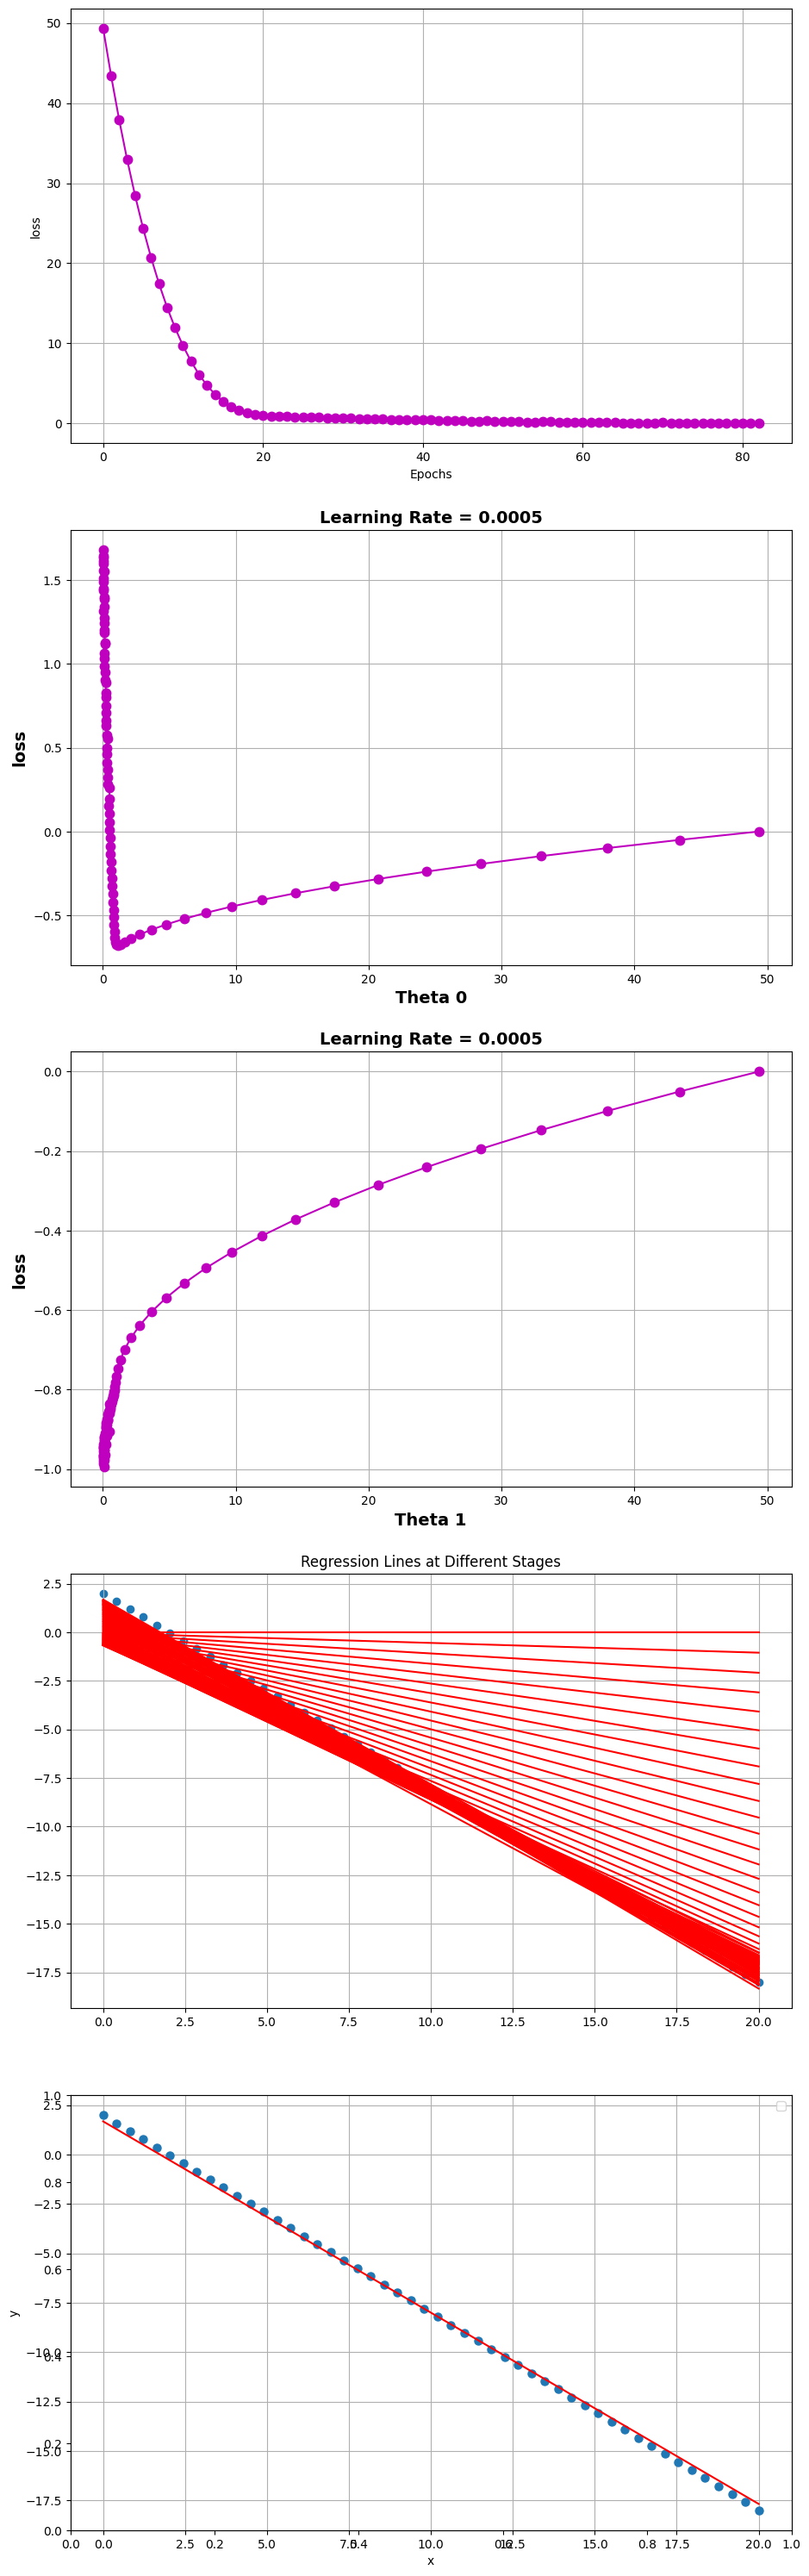

In [14]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [15]:
theta_0, theta_1, losses, theta_0_all, theta_1_all,h=adam(X, y, 0.005, 0.5,0.8, 1e-08, iterations=500)

Streaming output truncated to the last 5000 lines.
 -12.1886101  -12.54577026 -12.90293041 -13.26009057 -13.61725072
 -13.97441088 -14.33157103 -14.68873118 -15.04589134 -15.40305149
 -15.76021165 -16.1173718  -16.47453195 -16.83169211 -17.18885226]

Error Vector:
[-1.68800471 -1.6370016  -1.58599849 -1.53499538 -1.48399226 -1.43298915
 -1.38198604 -1.33098293 -1.27997982 -1.22897671 -1.1779736  -1.12697049
 -1.07596738 -1.02496426 -0.97396115 -0.92295804 -0.87195493 -0.82095182
 -0.76994871 -0.7189456  -0.66794249 -0.61693938 -0.56593626 -0.51493315
 -0.46393004 -0.41292693 -0.36192382 -0.31092071 -0.2599176  -0.20891449
 -0.15791137 -0.10690826 -0.05590515 -0.00490204  0.04610107  0.09710418
  0.14810729  0.1991104   0.25011351  0.30111663  0.35211974  0.40312285
  0.45412596  0.50512907  0.55613218  0.60713529  0.6581384   0.70914152
  0.76014463  0.81114774]

J = 0.3669719376229256

Gradient Vector:
[[-0.4384284860046471]
 [-0.04902041070755409]]

Gradient Vector Norm: 0.4411604447

In [16]:
final_predictions=theta_0+theta_1*X
r2_score(y,final_predictions)

0.9927040853049125

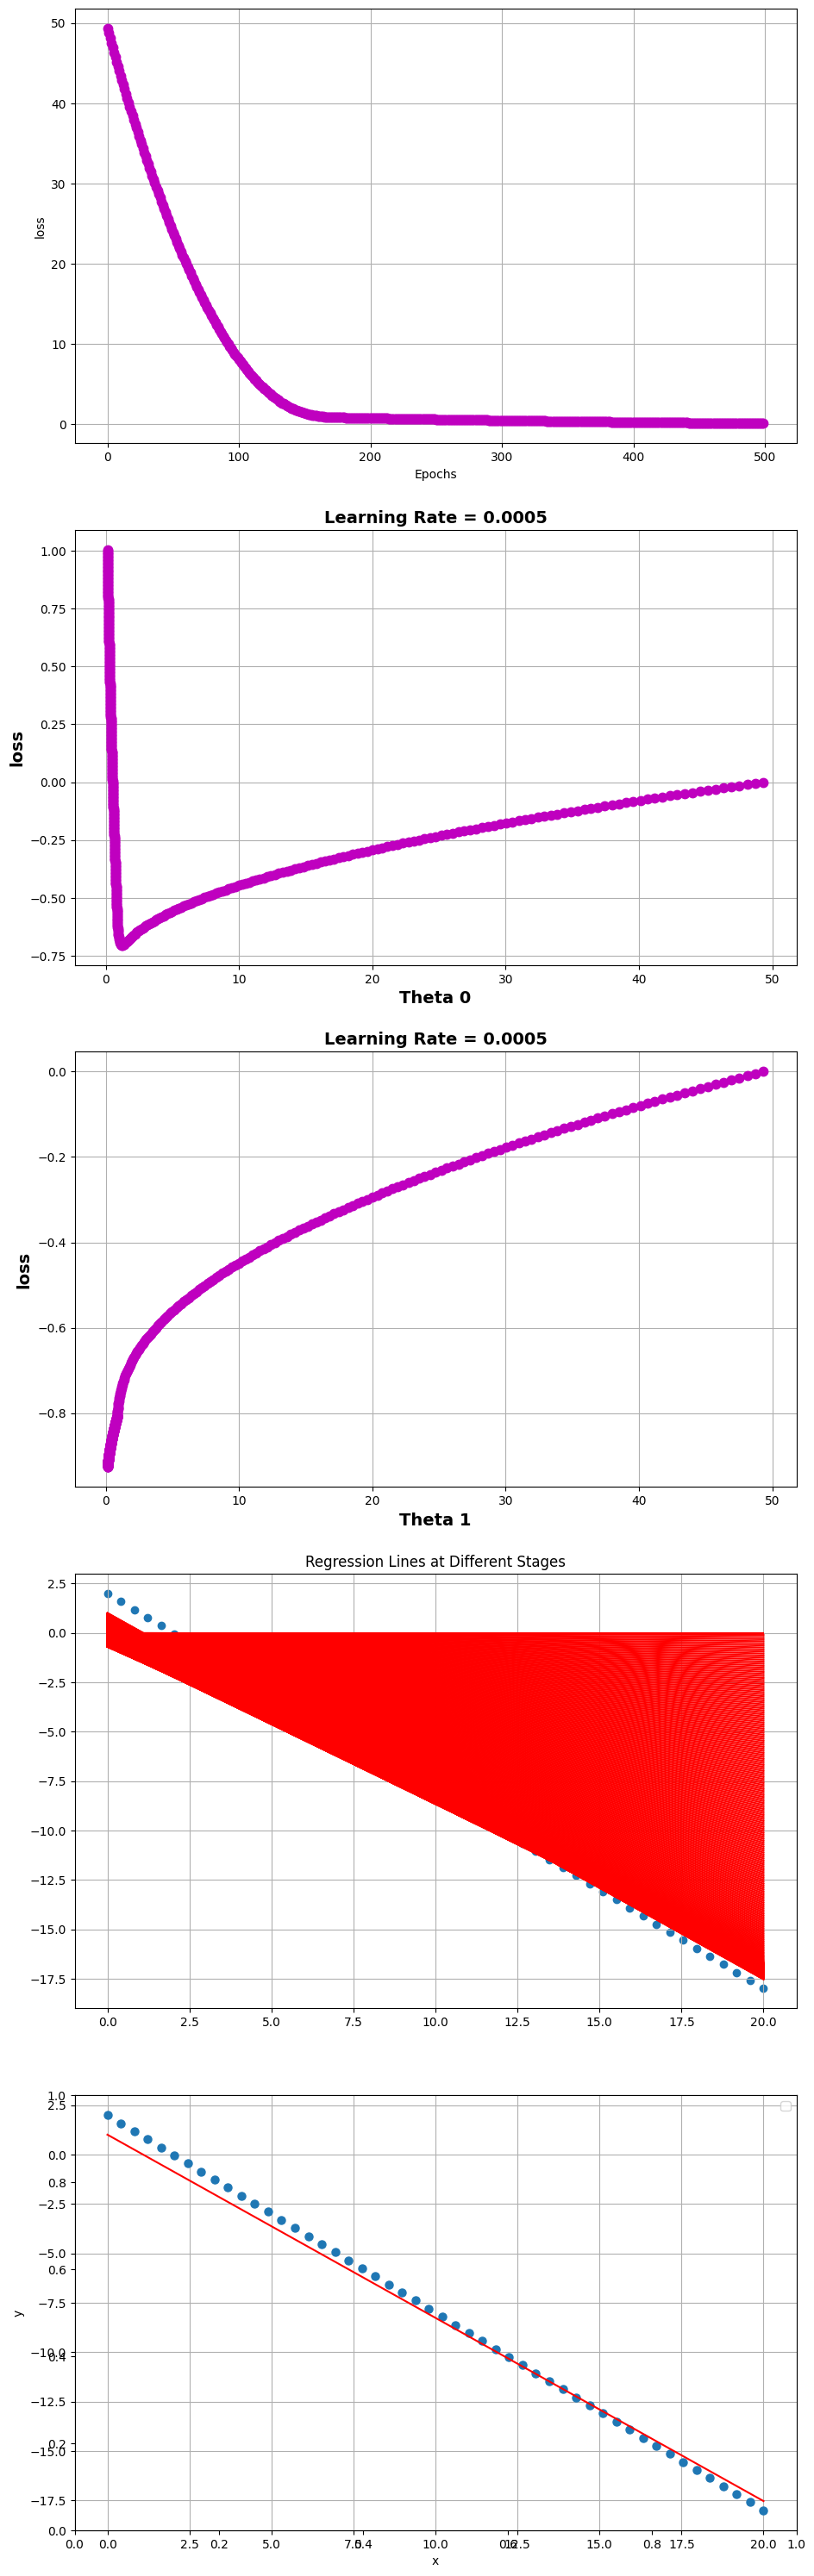

In [17]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [18]:
theta_0, theta_1, losses, theta_0_all, theta_1_all,h=adam(X, y, 0.0005, 0.8,0.8, 1e-08, iterations=5000)

Streaming output truncated to the last 5000 lines.
h(x): [ -0.72071559  -1.01500583  -1.30929606  -1.60358629  -1.89787653
  -2.19216676  -2.48645699  -2.78074723  -3.07503746  -3.36932769
  -3.66361792  -3.95790816  -4.25219839  -4.54648862  -4.84077886
  -5.13506909  -5.42935932  -5.72364956  -6.01793979  -6.31223002
  -6.60652026  -6.90081049  -7.19510072  -7.48939096  -7.78368119
  -8.07797142  -8.37226166  -8.66655189  -8.96084212  -9.25513235
  -9.54942259  -9.84371282 -10.13800305 -10.43229329 -10.72658352
 -11.02087375 -11.31516399 -11.60945422 -11.90374445 -12.19803469
 -12.49232492 -12.78661515 -13.08090539 -13.37519562 -13.66948585
 -13.96377608 -14.25806632 -14.55235655 -14.84664678 -15.14093702]

Error Vector:
[-2.72071559 -2.60684256 -2.49296953 -2.3790965  -2.26522346 -2.15135043
 -2.0374774  -1.92360437 -1.80973134 -1.6958583  -1.58198527 -1.46811224
 -1.35423921 -1.24036618 -1.12649314 -1.01262011 -0.89874708 -0.78487405
 -0.67100101 -0.55712798 -0.44325495 -0.32938192

In [19]:
final_predictions=theta_0+theta_1*X
r2_score(y,final_predictions)

0.9467864686555328

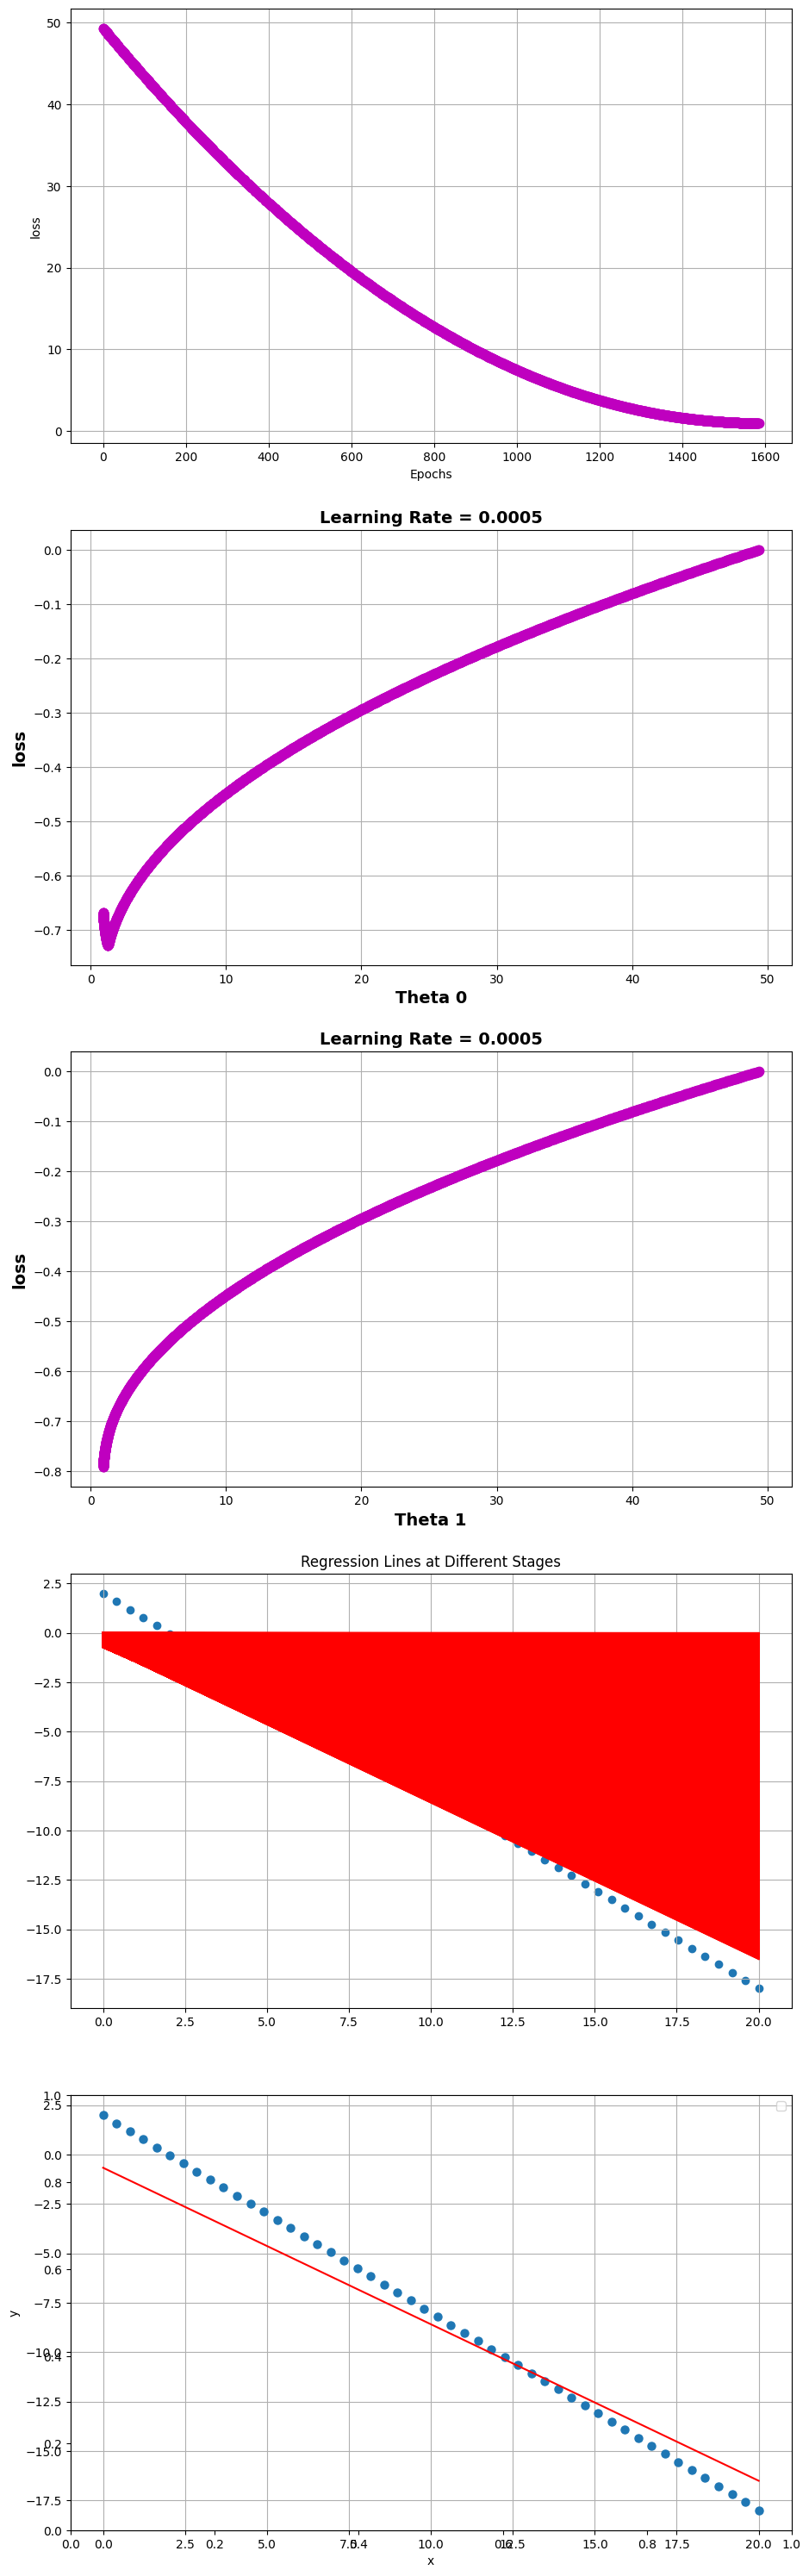

In [20]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)

### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [21]:
theta_0, theta_1, losses, theta_0_all, theta_1_all,h=adam(X, y, 0.001, 0.9,0.99, 1e-08, iterations=5000)

Streaming output truncated to the last 5000 lines.
  -6.69995296  -7.00154232  -7.30313168  -7.60472104  -7.9063104
  -8.20789976  -8.50948912  -8.81107848  -9.11266784  -9.4142572
  -9.71584656 -10.01743592 -10.31902528 -10.62061464 -10.92220401
 -11.22379337 -11.52538273 -11.82697209 -12.12856145 -12.43015081
 -12.73174017 -13.03332953 -13.33491889 -13.63650825 -13.93809761
 -14.23968697 -14.54127633 -14.84286569 -15.14445505 -15.44604441]

Error Vector:
[-2.66816574 -2.56159184 -2.45501794 -2.34844403 -2.24187013 -2.13529622
 -2.02872232 -1.92214841 -1.81557451 -1.7090006  -1.6024267  -1.49585279
 -1.38927889 -1.28270498 -1.17613108 -1.06955717 -0.96298327 -0.85640937
 -0.74983546 -0.64326156 -0.53668765 -0.43011375 -0.32353984 -0.21696594
 -0.11039203 -0.00381813  0.10275578  0.20932968  0.31590359  0.42247749
  0.5290514   0.6356253   0.74219921  0.84877311  0.95534701  1.06192092
  1.16849482  1.27506873  1.38164263  1.48821654  1.59479044  1.70136435
  1.80793825  1.91451216  2.

In [22]:
final_predictions=theta_0+theta_1*X
r2_score(y,final_predictions)

0.9485887893972601

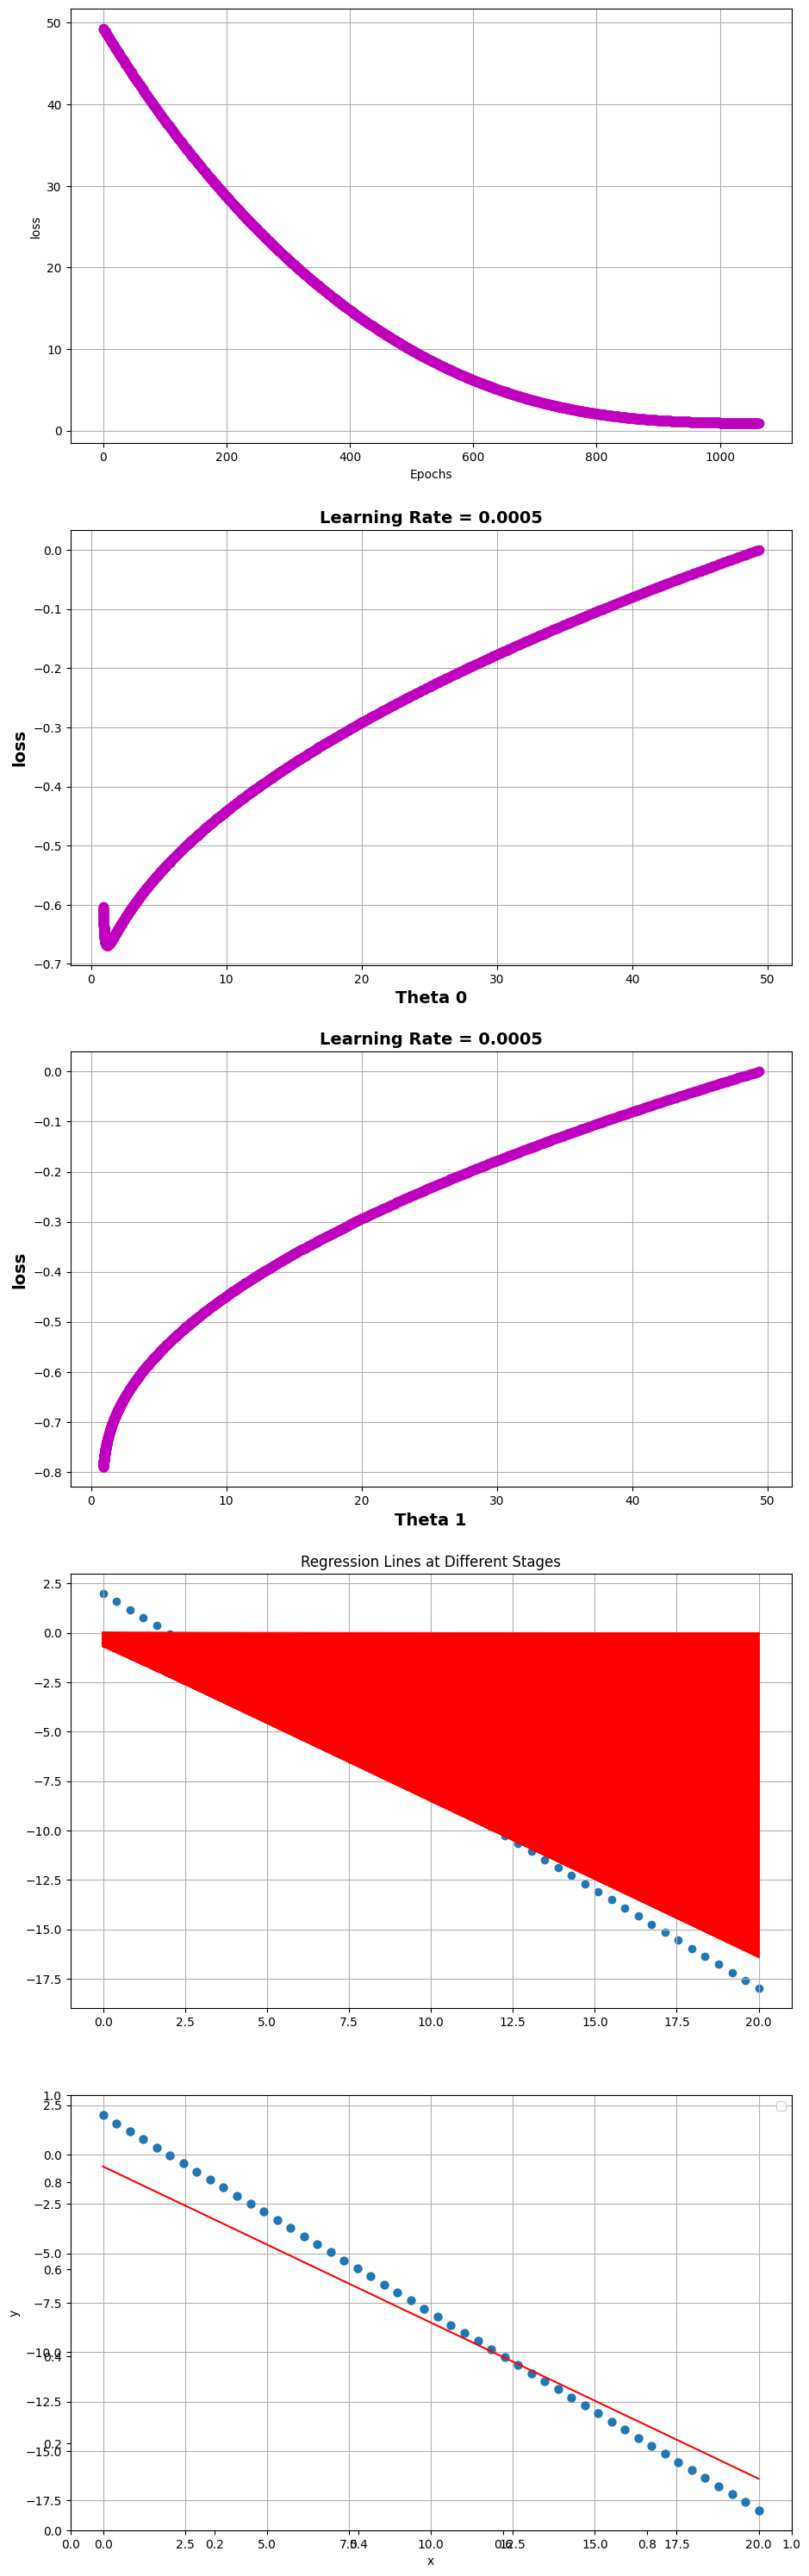

In [23]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [24]:
theta_0, theta_1, losses, theta_0_all, theta_1_all,h=adam(X, y, 0.001, 0.9,0.5, 1e-08, iterations=5000)

Streaming output truncated to the last 5000 lines.
h(x): [ -0.63166613  -0.88823251  -1.1447989   -1.40136528  -1.65793167
  -1.91449806  -2.17106444  -2.42763083  -2.68419721  -2.9407636
  -3.19732998  -3.45389637  -3.71046276  -3.96702914  -4.22359553
  -4.48016191  -4.7367283   -4.99329468  -5.24986107  -5.50642746
  -5.76299384  -6.01956023  -6.27612661  -6.532693    -6.78925939
  -7.04582577  -7.30239216  -7.55895854  -7.81552493  -8.07209131
  -8.3286577   -8.58522409  -8.84179047  -9.09835686  -9.35492324
  -9.61148963  -9.86805602 -10.1246224  -10.38118879 -10.63775517
 -10.89432156 -11.15088794 -11.40745433 -11.66402072 -11.9205871
 -12.17715349 -12.43371987 -12.69028626 -12.94685265 -13.20341903]

Error Vector:
[-2.63166613 -2.48006925 -2.32847237 -2.17687549 -2.02527861 -1.87368173
 -1.72208485 -1.57048797 -1.41889109 -1.26729421 -1.11569733 -0.96410045
 -0.81250357 -0.66090669 -0.50930981 -0.35771293 -0.20611605 -0.05451917
  0.0970777   0.24867458  0.40027146  0.55186834  

In [25]:
final_predictions=theta_0+theta_1*X
r2_score(y,final_predictions)

0.9442858092810318

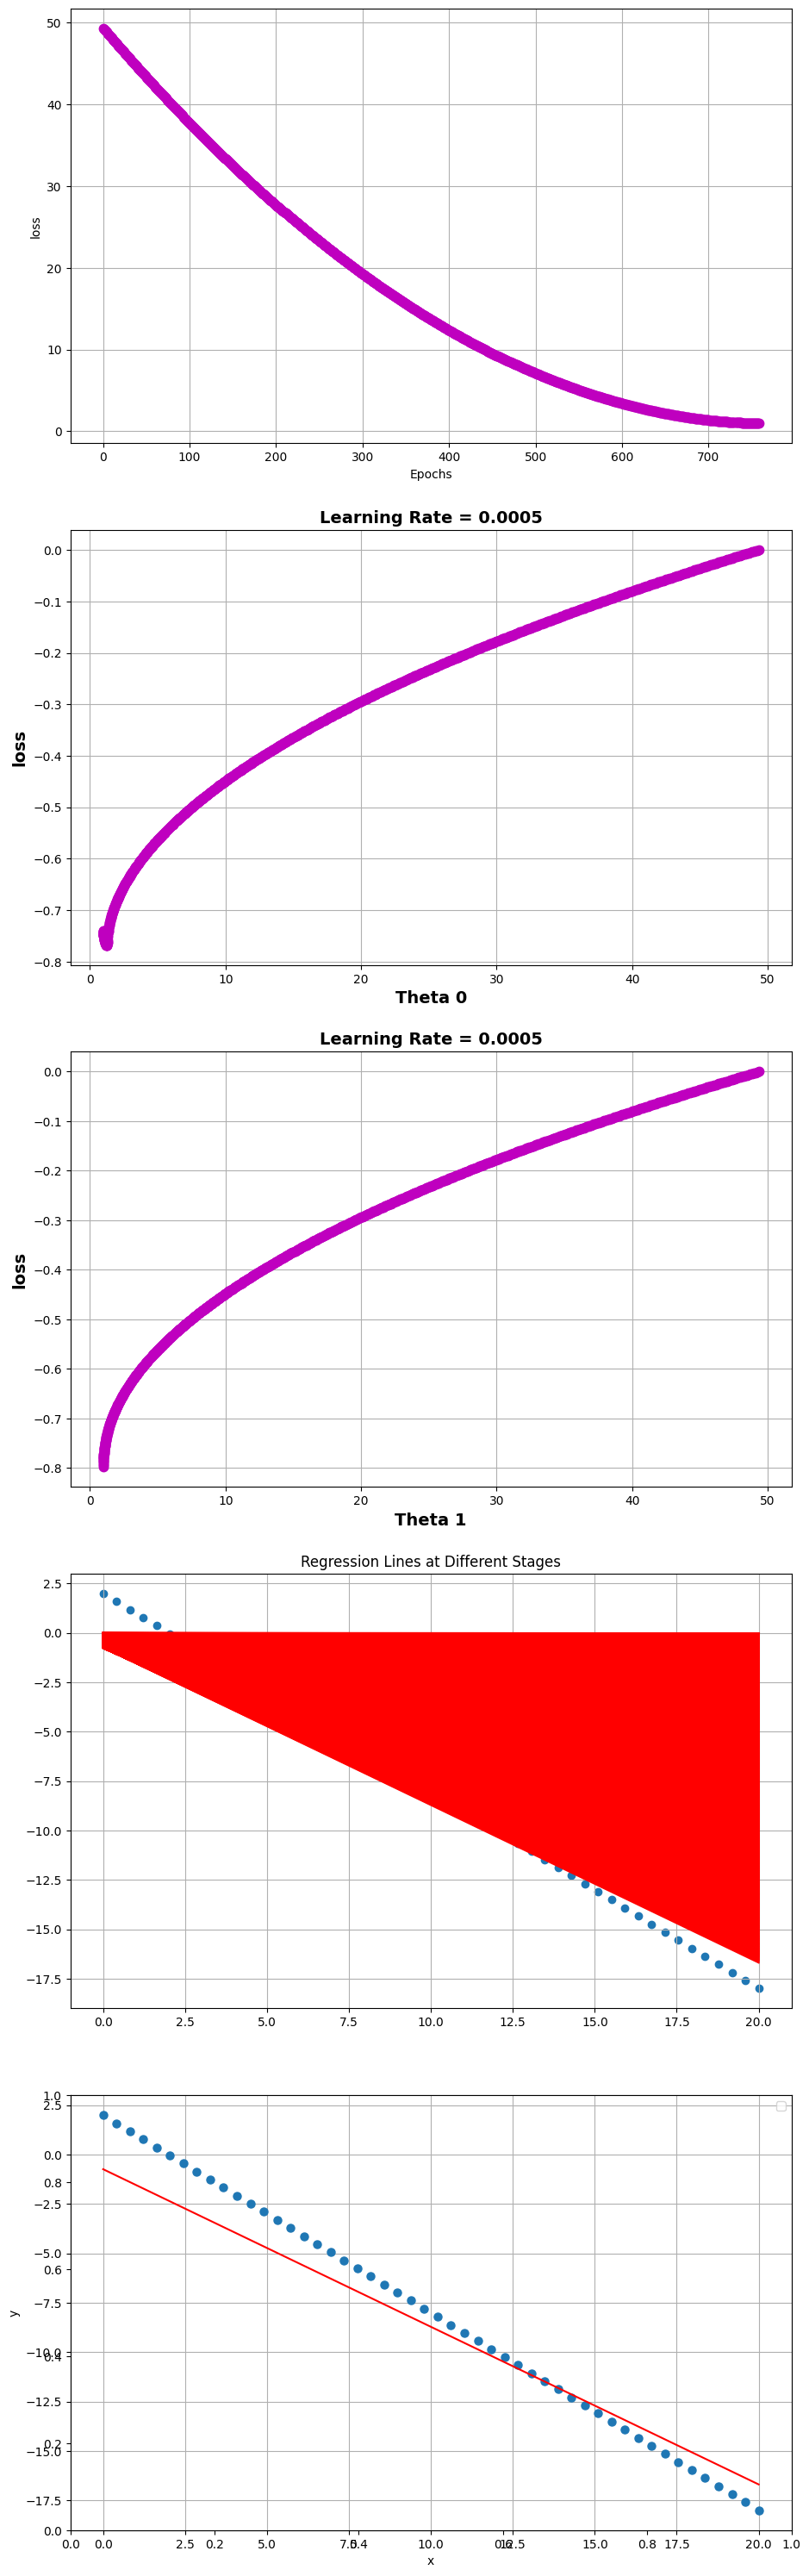

In [26]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [27]:
theta_0, theta_1, losses, theta_0_all, theta_1_all,h=adam(X, y, 0.001, 0.5,0.99, 1e-08, iterations=5000)

Streaming output truncated to the last 5000 lines.
theta_1_new: -0.7435333767745528

****************** Iteration 948 ********************

h(x): [ -0.66175836  -0.96524138  -1.26872439  -1.5722074   -1.87569041
  -2.17917342  -2.48265643  -2.78613944  -3.08962245  -3.39310546
  -3.69658847  -4.00007148  -4.3035545   -4.60703751  -4.91052052
  -5.21400353  -5.51748654  -5.82096955  -6.12445256  -6.42793557
  -6.73141858  -7.03490159  -7.3383846   -7.64186762  -7.94535063
  -8.24883364  -8.55231665  -8.85579966  -9.15928267  -9.46276568
  -9.76624869 -10.0697317  -10.37321471 -10.67669772 -10.98018074
 -11.28366375 -11.58714676 -11.89062977 -12.19411278 -12.49759579
 -12.8010788  -13.10456181 -13.40804482 -13.71152783 -14.01501085
 -14.31849386 -14.62197687 -14.92545988 -15.22894289 -15.5324259 ]

Error Vector:
[-2.66175836 -2.55707811 -2.45239786 -2.3477176  -2.24303735 -2.13835709
 -2.03367684 -1.92899658 -1.82431633 -1.71963607 -1.61495582 -1.51027557
 -1.40559531 -1.30091506 -1.1962

In [28]:
final_predictions=theta_0+theta_1*X
r2_score(y,final_predictions)

0.9493460405768266

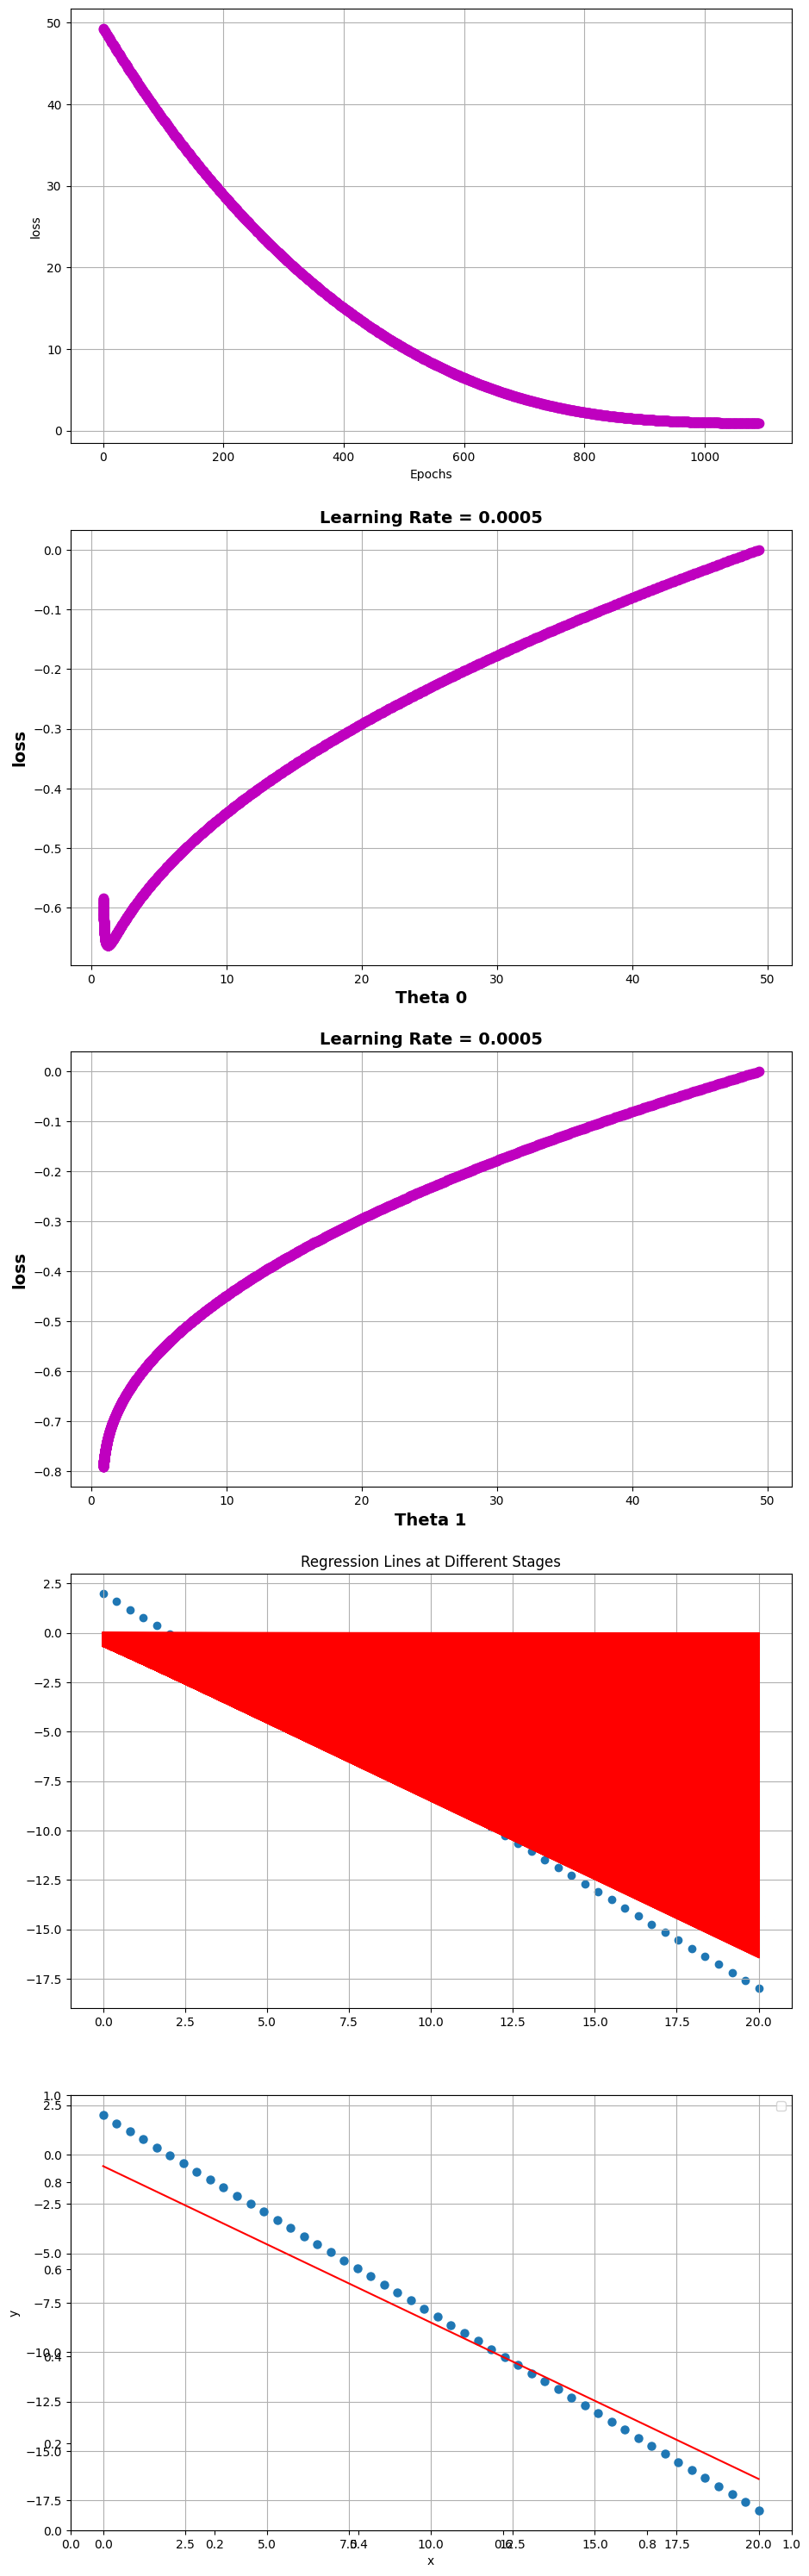

In [29]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [30]:
theta_0, theta_1, losses, theta_0_all, theta_1_all,h=adam(X, y, 0.001, 0.5,0.5, 1e-08, iterations=5000)

Streaming output truncated to the last 5000 lines.
theta_1_new: -0.6590078856673189

****************** Iteration 659 ********************

h(x): [ -0.65898705  -0.92796986  -1.19695267  -1.46593548  -1.73491829
  -2.0039011   -2.27288391  -2.54186672  -2.81084953  -3.07983234
  -3.34881515  -3.61779796  -3.88678077  -4.15576358  -4.42474639
  -4.6937292   -4.96271201  -5.23169483  -5.50067764  -5.76966045
  -6.03864326  -6.30762607  -6.57660888  -6.84559169  -7.1145745
  -7.38355731  -7.65254012  -7.92152293  -8.19050574  -8.45948855
  -8.72847136  -8.99745417  -9.26643698  -9.53541979  -9.8044026
 -10.07338541 -10.34236822 -10.61135103 -10.88033385 -11.14931666
 -11.41829947 -11.68728228 -11.95626509 -12.2252479  -12.49423071
 -12.76321352 -13.03219633 -13.30117914 -13.57016195 -13.83914476]

Error Vector:
[-2.65898705 -2.51980659 -2.38062614 -2.24144568 -2.10226523 -1.96308477
 -1.82390432 -1.68472386 -1.54554341 -1.40636295 -1.2671825  -1.12800204
 -0.98882159 -0.84964113 -0.710460

In [32]:
final_predictions=theta_0+theta_1*X
r2_score(y,final_predictions)

0.9475856920351761

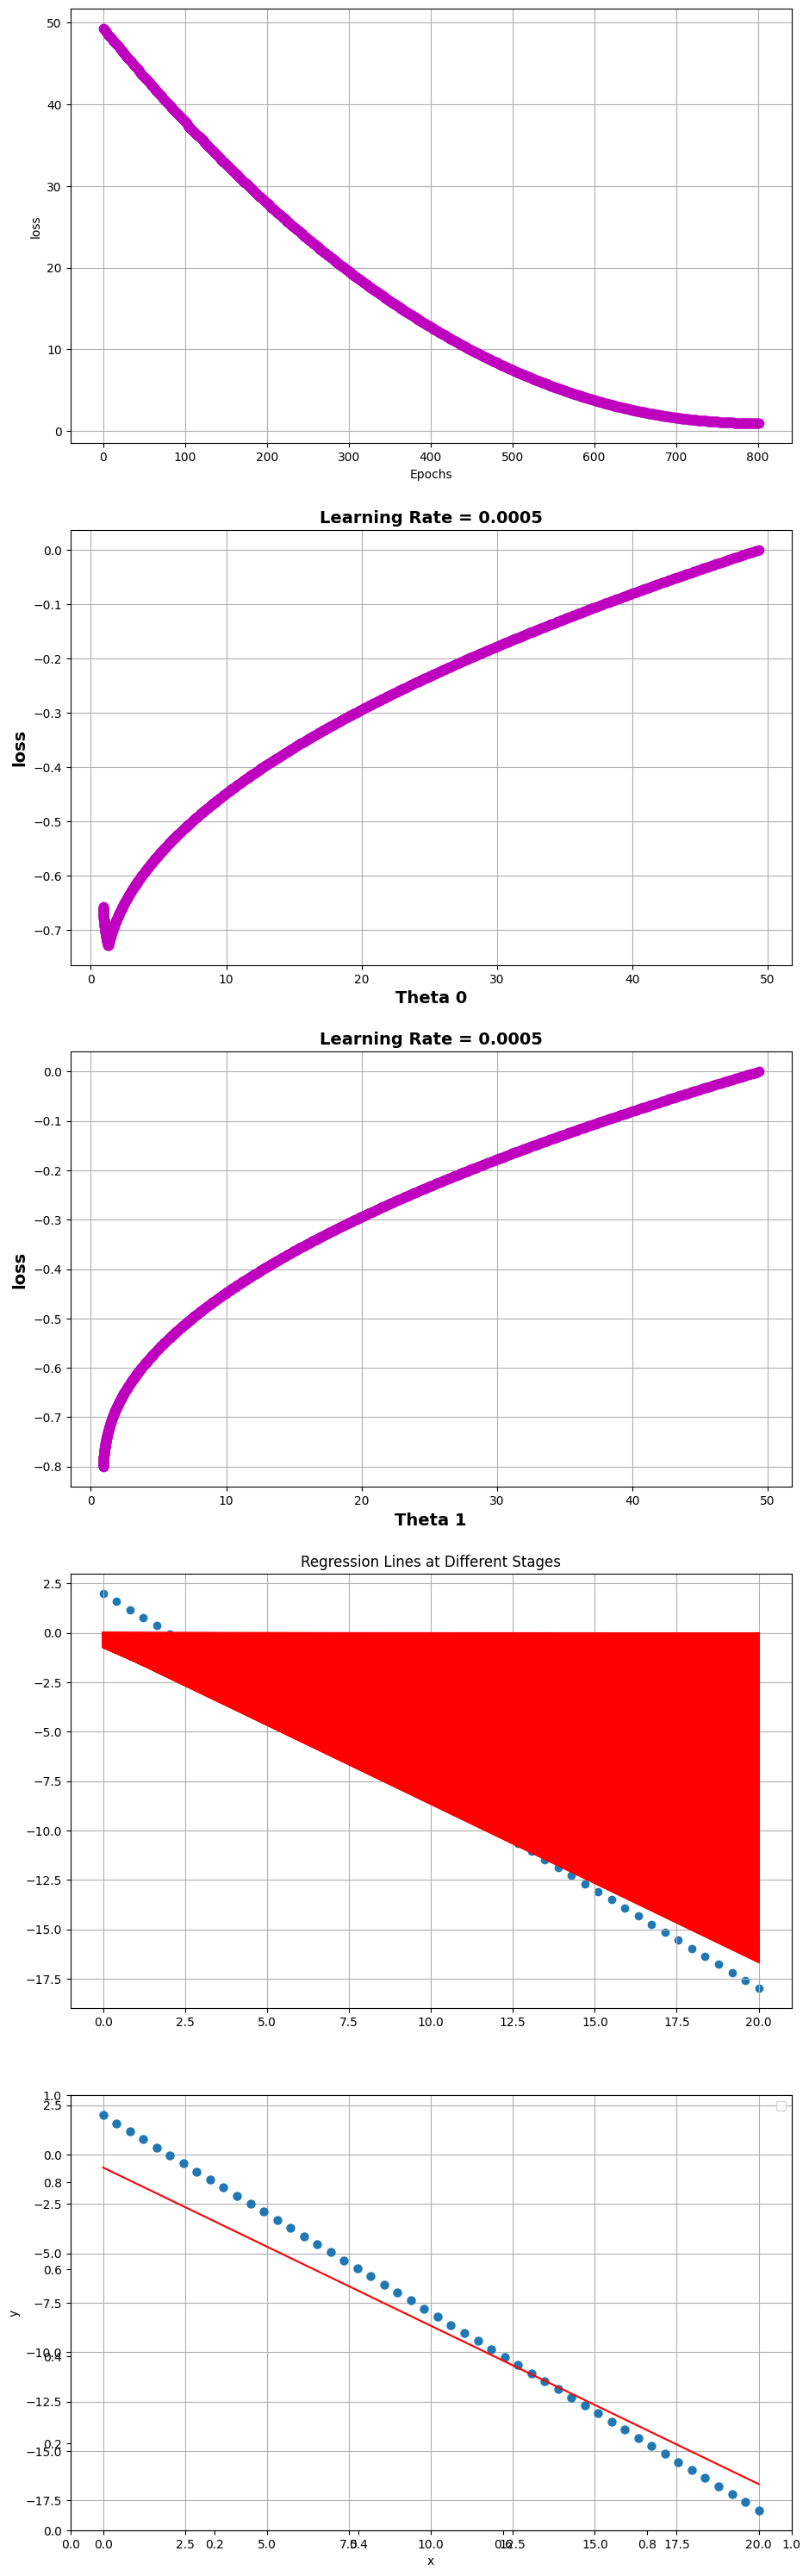

In [33]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [34]:
theta_0, theta_1, losses, theta_0_all, theta_1_all,h=adam(X, y, 0.01, 0.9,0.99, 1e-08, iterations=5000)

Streaming output truncated to the last 5000 lines.
 -1.24360558 -1.19631032 -1.14901507 -1.10171982 -1.05442456 -1.00712931
 -0.95983406 -0.9125388  -0.86524355 -0.81794829 -0.77065304 -0.72335779
 -0.67606253 -0.62876728 -0.58147203 -0.53417677 -0.48688152 -0.43958627
 -0.39229101 -0.34499576 -0.2977005  -0.25040525 -0.20311    -0.15581474
 -0.10851949 -0.06122424 -0.01392898  0.03336627  0.08066153  0.12795678
  0.17525203  0.22254729  0.26984254  0.31713779  0.36443305  0.4117283
  0.45902356  0.50631881  0.55361406  0.60090932  0.64820457  0.69549982
  0.74279508  0.79009033]

J = 0.3008600443312168

Gradient Vector:
[[-0.36864338439442274]
 [0.33366272426314325]]

Gradient Vector Norm: 0.49722103577833116

theta_0_new: 0.4778652867012989
theta_1_new: -0.8845275441717797

****************** Iteration 421 ********************

h(x): [  0.47786529   0.11683364  -0.24419801  -0.60522967  -0.96626132
  -1.32729297  -1.68832462  -2.04935627  -2.41038792  -2.77141957
  -3.13245122  -3.49

In [35]:
final_predictions=theta_0+theta_1*X
r2_score(y,final_predictions)

0.995342569329113

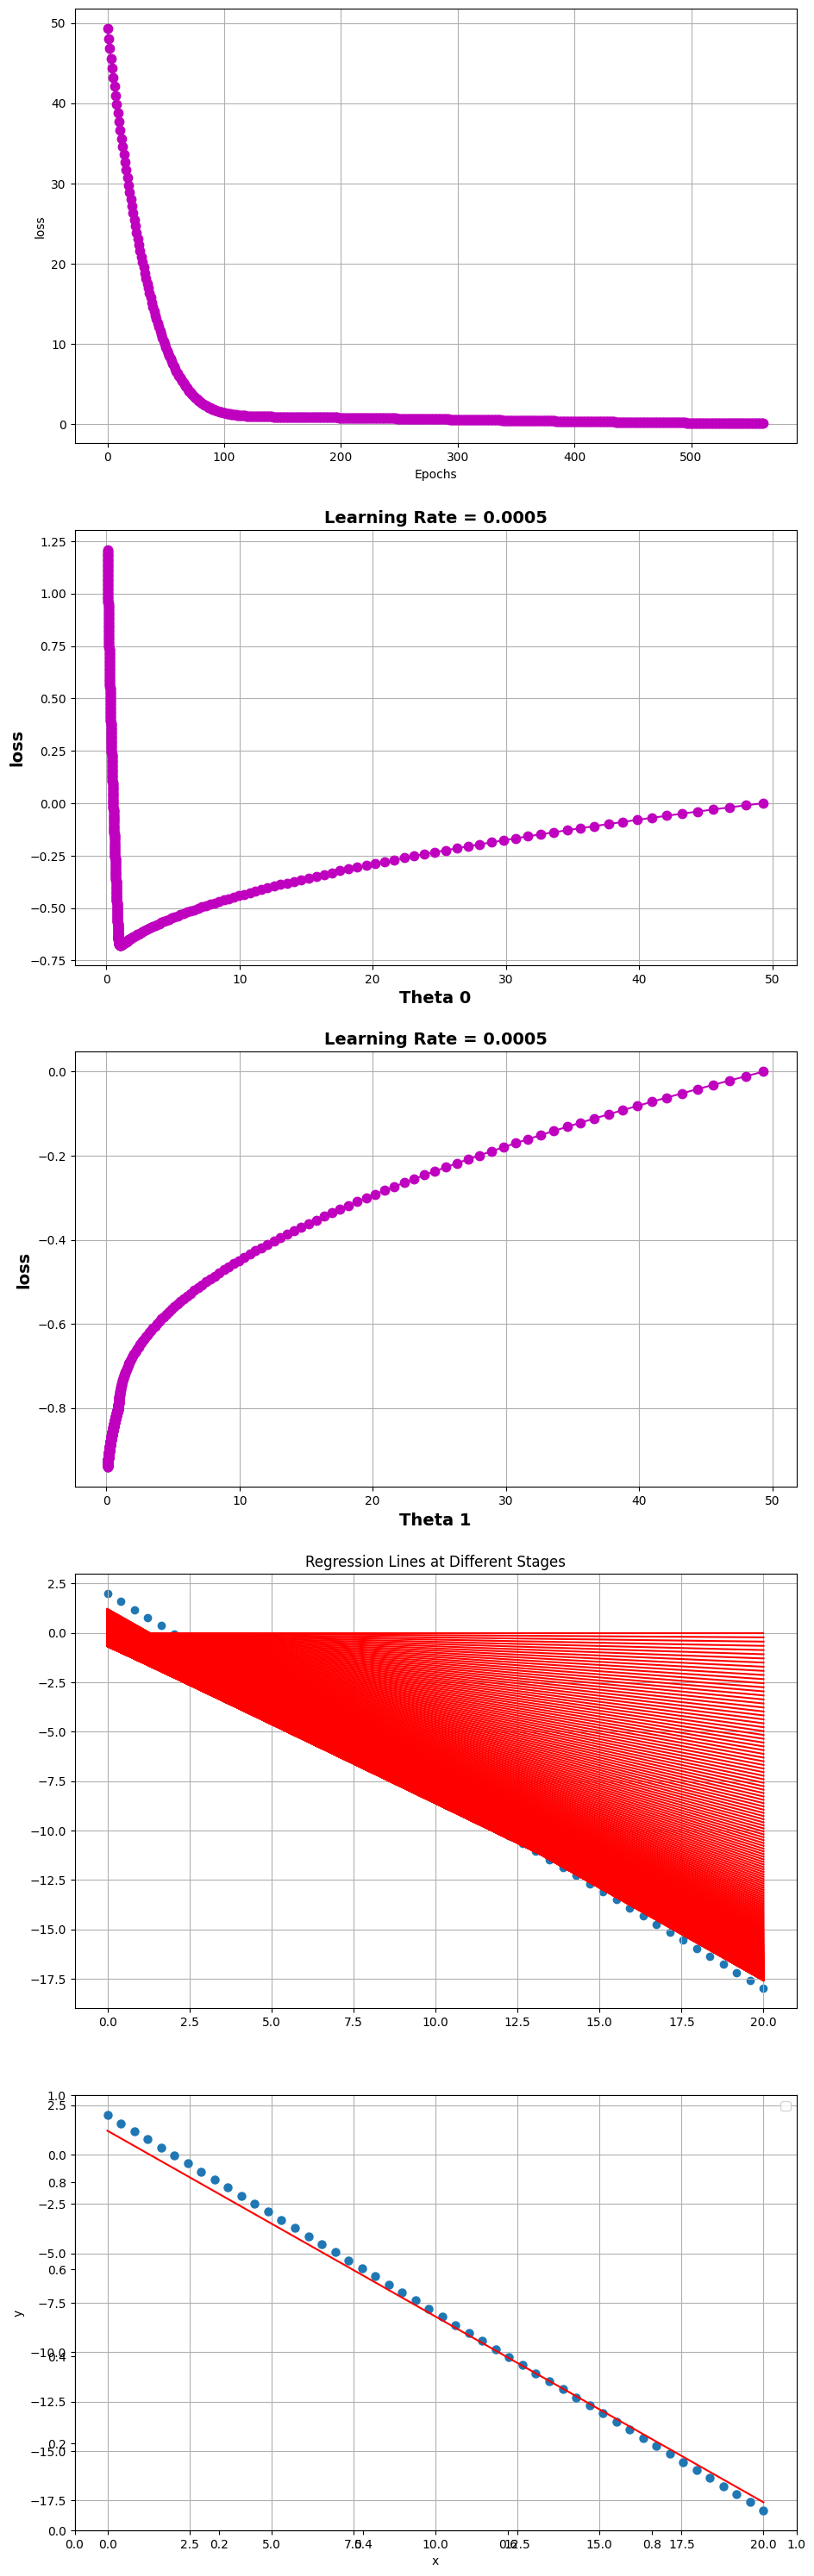

In [36]:
fig = plt.figure(figsize=(10.8, 38))

fig.add_subplot(5,1,1)
plt_loss_epoch(losses)

fig.add_subplot(5,1,2)
plt_loss_theta_0(theta_0_all,losses)

fig.add_subplot(5,1,3)
plt_loss_theta_1(theta_1_all,losses)


plt.subplot(5, 1, 4)
until_converage(theta_0_all,theta_1_all,X,y)
#x and y and y predicted
fig.add_subplot(5,1,5)
final_model(X,y,final_predictions)

## Congratulations
![image.png](attachment:image.png)